# DSA3101 RFM Modelling

Our group is a Data Science Consulting Company which has been approached by a client, which would like us to reach some insights that might help them make better business decisions by analysing their data.

Three sets of data were given to the Data Science Consulting Company in hopes of deriving the appropriate insights about customer purchasing behaviour and devising the corresponding strategies to increase customer retention and maximise its profit. 

Looking at the data given, it seems as if the company being analysed is a grocery chain which sells a wide range of products. As such, a customer was defined according to the usual expected behaviour of customers in a grocery store.



**Contents:**
- [Import Libraries](#lib_imports)
- [Import Datasets](#data_imports)
- [Data Cleaning](#data_clean)
- [Exploratory Data Analysis](#eda)
  - [Implementation of the RFM Model](#rfm_impl)
  - [Exploratory Data Analysis with RFM Models](#eda_rfm)
  - [Proposed Actionable Insights from RFM Analysis](#actionable)
- [Conclusion](#end)

<a id='lib_imports'></a>

## Import Libraries

In [1]:
import matplotlib.pyplot as plt                   
import pandas as pd                               
import numpy as np                                
import seaborn as sns
import os
import urllib
from plotnine import *
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id='data_imports'></a>

## Import Datasets

In [108]:
# import datasets
datapath = os.path.join("datasets", "")
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/leongjwm/dsa3101_hackathon/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("DSA3101_Hackathon_Categories_Information.csv", "DSA3101_Hackathon_Data.csv", "DSA3101_Hackathon_Panelists_Demographics.xlsx"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [3]:
transactions = pd.read_csv(datapath + "DSA3101_Hackathon_Data.csv") # customer transactions
categories = pd.read_csv(datapath + "DSA3101_Hackathon_Categories_Information.csv") # product categories
demographics = pd.read_excel(datapath + "DSA3101_Hackathon_Panelists_Demographics.xlsx") # customer information

In [4]:
transactions.head()

,Panel ID,Date,Category,Pack Size,Volume,Spend
0,Panel 101011101,2017-07-02,CSD,1,1.5,1.5
1,Panel 101011101,2017-07-02,Soy Milk,1,1.0,2.8
2,Panel 101011101,2017-07-02,Cooking Sauces,1,0.3,3.2
3,Panel 101011101,2017-07-02,Coconut Milk,2,0.4,5.3
4,Panel 101011101,2017-07-02,Chocolate,1,0.2,6.6


In [5]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318024 entries, 0 to 1318023
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Panel ID   1318024 non-null  object 
 1   Date       1318024 non-null  object 
 2   Category   1318024 non-null  object 
 3   Pack Size  1318024 non-null  int64  
 4   Volume     1318024 non-null  float64
 5   Spend      1318024 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 60.3+ MB


We note that the `Date` values have the `object` datatype, so we should convert them to the `datetime` datatype.

In [6]:
transactions['Date'] = pd.to_datetime(transactions['Date'], format = "%Y-%m-%d")
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318024 entries, 0 to 1318023
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Panel ID   1318024 non-null  object        
 1   Date       1318024 non-null  datetime64[ns]
 2   Category   1318024 non-null  object        
 3   Pack Size  1318024 non-null  int64         
 4   Volume     1318024 non-null  float64       
 5   Spend      1318024 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 60.3+ MB


In [7]:
categories.head()

,Category,Calories/100g,Price per Volume
0,Baby Cereal,188,29.41
1,Beer,43,15.12
2,Belacan,563,39.47
3,Bird Nest,46,73.45
4,Biscuits,416,15.57


In [8]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          62 non-null     object 
 1   Calories/100g     62 non-null     int64  
 2   Price per Volume  62 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ KB


In [9]:
demographics.head()

,ID,BMI,Income,Ethnicity,Lifestage,Strata,#HH,location
0,Panel 101011101,Obese,Income 1500 - 1999,North Malay,Empty Nesters,Urban,1-3 Member HH,North
1,Panel 101016101,Healthy,Income 1500 - 1999,North Malay,Teens Aches,Urban,1-3 Member HH,North
2,Panel 101019101,Obese,Income < 1500,North Malay,Teens Aches,Urban,4 Member HH,North
3,Panel 101024101,Over Weight,Income 1500 - 1999,North Chinese,Nesting Families,Urban,1-3 Member HH,North
4,Panel 105009103,Over Weight,Income < 1500,North Malay,Empty Nesters,Rural,1-3 Member HH,North


In [10]:
demographics.rename(columns={"ID" : "Panel ID"}, inplace=True)
demographics.head()

,Panel ID,BMI,Income,Ethnicity,Lifestage,Strata,#HH,location
0,Panel 101011101,Obese,Income 1500 - 1999,North Malay,Empty Nesters,Urban,1-3 Member HH,North
1,Panel 101016101,Healthy,Income 1500 - 1999,North Malay,Teens Aches,Urban,1-3 Member HH,North
2,Panel 101019101,Obese,Income < 1500,North Malay,Teens Aches,Urban,4 Member HH,North
3,Panel 101024101,Over Weight,Income 1500 - 1999,North Chinese,Nesting Families,Urban,1-3 Member HH,North
4,Panel 105009103,Over Weight,Income < 1500,North Malay,Empty Nesters,Rural,1-3 Member HH,North


In [11]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4026 entries, 0 to 4025
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Panel ID   4026 non-null   object
 1   BMI        4026 non-null   object
 2   Income     4026 non-null   object
 3   Ethnicity  4026 non-null   object
 4   Lifestage  4026 non-null   object
 5   Strata     4026 non-null   object
 6   #HH        4026 non-null   object
 7   location   4026 non-null   object
dtypes: object(8)
memory usage: 251.8+ KB


<a id='data_clean'></a>

## Data Cleaning

We first remove the rows where `Spend` == 0 or (`Pack Size` == 0 and `Volume` == 0), then remove rows where transactions were 2 years before the most recent transaction date.

In [12]:
# Remove rows with Spend == 0
remove_spend0 = transactions.loc[transactions.Spend == 0].index
transactions_clean = transactions.drop(remove_spend0, axis=0)

# Remove rows with Pack Size == 0 and Volume == 0
remove_volPS0 = transactions_clean.loc[(transactions_clean.Volume<=0) & (transactions_clean["Pack Size"]<=0)].index
transactions_clean = transactions_clean.drop(remove_volPS0, axis=0)

# Remove rows where transactions were 2 years before latest transaction
print("Latest transaction Date: " + str(transactions['Date'].max())) # 14-06-2020 is the latest transaction date
yearslimit = pd.to_datetime('20180615', format='%Y%m%d')
remove_toolong = transactions_clean.loc[(transactions_clean.Date<=yearslimit)].index

transactions_clean = transactions_clean.drop(remove_toolong, axis=0)
transactions_clean

Latest transaction Date: 2020-06-14 00:00:00


,Panel ID,Date,Category,Pack Size,Volume,Spend
125,Panel 101011101,2018-06-17,Coconut Milk,2,0.4,6.2
126,Panel 101011101,2018-06-17,Condensed/Evap Milk,2,0.8,6.1
127,Panel 101011101,2018-06-17,Condensed/Evap Milk,2,0.8,10.0
128,Panel 101011101,2018-06-24,Coffee,3,0.6,9.6
129,Panel 101011101,2018-07-01,Sugar,5,5.0,13.5
...,...,...,...,...,...,...
1318019,Panel 801912801,2020-02-23,MSG,1,0.1,2.2
1318020,Panel 801912801,2020-02-23,Eggs,1,30.0,8.4
1318021,Panel 801912801,2020-02-23,Ice Cream,1,1.5,8.0
1318022,Panel 801912801,2020-02-23,Cooking Sauces,1,0.7,4.8


<a id='eda'></a>

## Exploratory Data Analysis

Some common goals between various clients would be to improve customer retention, while increasing their revenue.

<a id='rfm_impl'></a>

### Implementation of the RFM Model
A descriptive model that emcompasses these goals is the RFM Model, which is a measure of each customer by these three variables:

* Recency: the most recent date the customer has purchased anything from the client
* Frequency: how frequent the customer purchases something from the client
* Monetary Value: how much money the customer spends on the goods and services of a client (within a certain time frame)

Each customer would be scored on each variable from a score of 1-5, with 1 and 5 being the worst and best scores respectively. These scores would be concatenated together to form a total RFM score, where they would range from 111 to 555, where 555 represents the 'best' customers.

Since the latest transaction Date was 14th June 2020, we should use the following day (15th June 2020) as a baseline date for the `Recency` variable of the RFM Model. 

To track the changes of each customer's RFM score, we would split the cleaned dataset we have into two: one which represents the first and second year respectively.

In [13]:
# Separate dataset into the length of a year
year_cutoff = pd.to_datetime('20190615', format='%Y%m%d')

transactions_clean_year1 = transactions_clean[transactions_clean['Date'] <= year_cutoff]
transactions_clean_year2 = transactions_clean[transactions_clean['Date'] > year_cutoff]

In [14]:
# Ensure only customers from the first year are considered for RFM

year1_IDs = transactions_clean_year1['Panel ID'].unique()

transactions_clean_year2 = transactions_clean_year2[transactions_clean_year2['Panel ID'].isin(year1_IDs)]

In [15]:
print(transactions_clean_year1['Date'].max())
print(transactions_clean_year2['Date'].max())
print(transactions_clean_year1['Date'].min())
print(transactions_clean_year2['Date'].min())

2019-06-09 00:00:00
2020-06-14 00:00:00
2018-06-17 00:00:00
2019-06-16 00:00:00


In [16]:
# Obtain customers who transacted in the first year but not second
year2_IDs = transactions_clean_year2['Panel ID'].unique()
likely_churned = transactions_clean_year1[~transactions_clean_year1['Panel ID'].isin(year2_IDs)] # usage of '~' means notin
print(likely_churned['Panel ID'].nunique())

379


For the customers who made transactions in the first year but not the second, it's likely that they have already churned. They have spent $0 in the entire second year, have not arrived once and their last arrival date is over a year ago (relative to the end of the second year). 

To ensure that their entries are reflected in the second year, I would add take the number of days since they last arrived as 365 days, and account for them in the second year's dataset. 

In [17]:
for ID in likely_churned['Panel ID'].unique():
  new_row = {'Panel ID': ID, 'Date': pd.to_datetime('20190615', format='%Y%m%d'), 'Category': 'Psuedo-Category', 'Pack Size': 0, 'Volume': 0.0, 'Spend': 0.0}
  transactions_clean_year2 = transactions_clean_year2.append(new_row, ignore_index=True)

In [18]:
transactions_clean_year1['Panel ID'].nunique()

2494

In [19]:
transactions_clean_year2['Panel ID'].nunique()

2494

Now that these two datasets have the exact same customer IDs, we can proceed to do our RFM.

In [20]:
refDate1 = pd.to_datetime('20190610', format='%Y%m%d') #Creating the baseline date (2019-06-10) on monday since transactions for whole week is on sun (exactly 52 weeks)
rfmModel1 = transactions_clean_year1.groupby('Panel ID').agg({'Date': lambda x: (refDate1-x.max()).days,    # Creating the RFM model dataframe
                                            'Panel ID': lambda x: len(x),
                                            'Spend': lambda x : x.sum()} )

rfmModel1.rename(columns={'Date' : 'Recency','Panel ID':'Frequency', 'Spend':'Monetary'},inplace=True)
rfmModel1 = rfmModel1.reset_index()
print("RFM Model - Year 1: " + "\n")
print(rfmModel1.head())
print("\n")

refDate2 = pd.to_datetime('20200615', format='%Y%m%d') #Creating the baseline date (2020-06-15) on monday since transactions for whole week is on sun (exactly 52 weeks)
rfmModel2 = transactions_clean_year2.groupby('Panel ID').agg({'Date': lambda x: (refDate2-x.max()).days,    # Creating the RFM model dataframe
                                            'Panel ID': lambda x: len(x),
                                            'Spend': lambda x : x.sum()} )

rfmModel2.rename(columns={'Date' : 'Recency','Panel ID':'Frequency', 'Spend':'Monetary'},inplace=True)
rfmModel2 = rfmModel2.reset_index()
print("RFM Model - Year 2: " + "\n")
print(rfmModel2.head())

RFM Model - Year 1: 

          Panel ID  Recency  Frequency  Monetary
0  Panel 101011101        8        141    1190.9
1  Panel 101016101       15        105     630.8
2  Panel 101019101        1        598    2515.6
3  Panel 101024101        1        375    2147.4
4  Panel 105009103        1        428    1598.3


RFM Model - Year 2: 

          Panel ID  Recency  Frequency  Monetary
0  Panel 101011101       15        138    1670.2
1  Panel 101016101        8         97     593.8
2  Panel 101019101        1        564    2697.2
3  Panel 101024101        1        279    1813.3
4  Panel 105009103        1        399    1522.6


To determine how to separate each tier (from 1 to 5) of each variable properly, we should check the distribution of each variable first.

In [21]:
round(rfmModel1.describe(), 2)

,Recency,Frequency,Monetary
count,2494.00,2494.00,2494.00
mean,30.31,169.11,1628.80
std,70.85,146.15,1327.55
min,1.00,1.00,2.00
25%,1.00,71.00,704.25
50%,1.00,134.50,1367.05
75%,15.00,228.75,2232.95
max,358.00,1445.00,17724.30


In [22]:
round(rfmModel2.describe(), 2)

,Recency,Frequency,Monetary
count,2494.00,2494.00,2494.00
mean,85.08,166.11,1586.40
std,140.69,156.54,1414.66
min,1.00,1.00,0.00
25%,1.00,57.00,553.47
50%,1.00,137.00,1364.55
75%,113.00,232.00,2317.62
max,366.00,1737.00,14500.60


The below shows the distribution of the `Recency`, `Frequency`, and `Monetary` variables. The top row shows the distributions for the first RFM model, while the below row shows the distributions for the other.

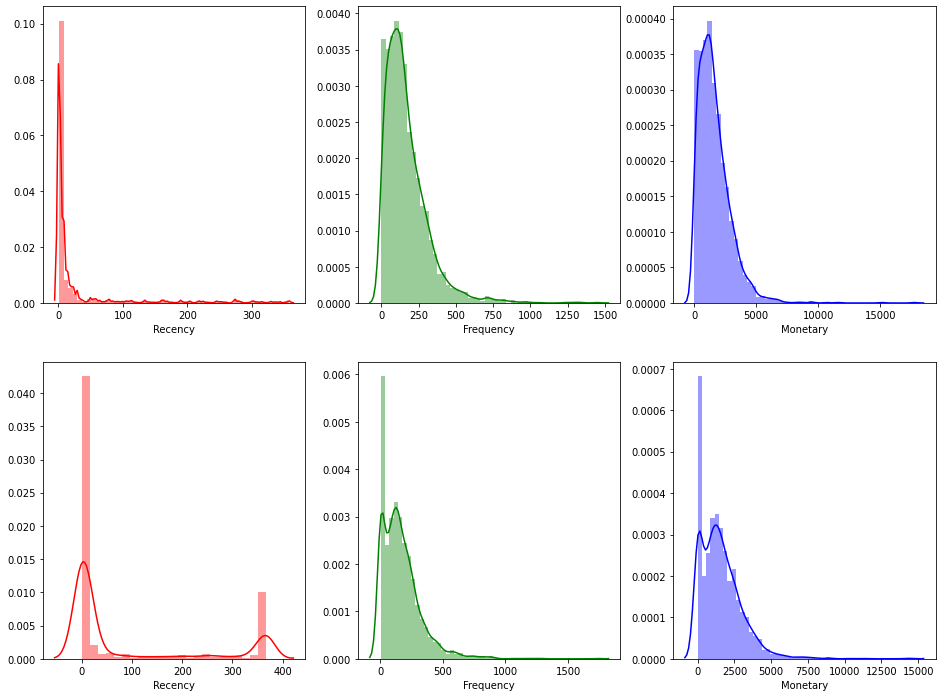

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(16, 12))
colors = ["r", "g", "b"]

for i in range(2):
  count = 0
  if i == 0:
    model_used = rfmModel1
  else:
    model_used = rfmModel2
  for var in ['Recency', 'Frequency', 'Monetary']:
      sns.distplot(model_used[var], color = colors[count], ax = axes[i, count])
      count += 1

Most of the graphs appear to be right-skewed. 

Notably, for the `Recency` column in both the Year 1 and 2 datasets, the 25th percentile and 50th percentile are the same. Therefore, when implementing the RFM model, we should exercise some caution when differentiating one `Recency` tier from another.

To check whether a 20% split for each tier would work, we examine the quantiles for each column:

In [24]:
quantiles1 = rfmModel1.quantile(q=[0.2,0.4,0.6,0.8]) # Get a dataframe of quantiles for each column
quantiles1 = quantiles1.to_dict() # Convert the dataframe into a nested dictionary of quantiles

quantiles2 = rfmModel2.quantile(q=[0.2,0.4,0.6,0.8]) # Get a dataframe of quantiles for each column
quantiles2 = quantiles2.to_dict() # Convert the dataframe into a nested dictionary of quantiles

print("Quantiles for Year 1 dataset: " + "\n")
for key, value in quantiles1.items():
  print(key, value)

print("\n")
print("Quantiles for Year 2 dataset: " + "\n")
for key, value in quantiles2.items():
  print(key, value)

Quantiles for Year 1 dataset: 

Recency {0.2: 1.0, 0.4: 1.0, 0.6: 8.0, 0.8: 22.0}
Frequency {0.2: 57.0, 0.4: 110.0, 0.6: 164.0, 0.8: 256.0}
Monetary {0.2: 562.0400000000001, 0.4: 1115.6400000000003, 0.6: 1650.48, 0.8: 2494.9400000000005}


Quantiles for Year 2 dataset: 

Recency {0.2: 1.0, 0.4: 1.0, 0.6: 8.0, 0.8: 253.0}
Frequency {0.2: 32.0, 0.4: 107.0, 0.6: 169.79999999999995, 0.8: 259.0}
Monetary {0.2: 302.96000000000004, 0.4: 1058.3400000000004, 0.6: 1668.82, 0.8: 2535.8199999999997}


Though splitting the population into five even sets would work fine for the `Frequency` and `Monetary` columns, we note that for the `Recency` column, the 20th and 40th percentile in both datasets are equal.

Therefore, it would be less meaningful to divide the column into 5 tiers representing 20% of the population each, for the `Recency` column. An example of an alternative approach we can adopt is below: 

* Tier 5: Within a week (7 days)
* Tier 4: Within 2 weeks (14 days)
* Tier 3: Within a month (31 days)
* Tier 2: Within 2 months (63 days)
* Tier 1: Beyond 2 months (>63 days)



In [25]:
# To show the extent of right-skewness of the Recency distributions
# print(rfmModel1[rfmModel1['Recency'] == 1]['Recency'].count() / rfmModel1.shape[0])
# print(rfmModel2[rfmModel2['Recency'] == 1]['Recency'].count() / rfmModel2.shape[0])

In [26]:
def RScores(x):        # Functions to get the RFM scores. For R scores, the smaller the number the higher the rank (most recent)
    if x <= 7:
        return 5         #For all values till 0.4 percentile, label as 5. None of the recency is labelled 4.
    elif x <= 14:
        return 4
    elif x <= 31:
        return 3
    elif x <= 63:
        return 2
    else:
        return 1
    
def FMScores(x,p,d):     #Function to get F and M scores. For F and M, the higher the rank, the more frequent and the more money
    if x <= d[p][0.2]:   #has been spent from the customer
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 4
    else:
        return 5

In [27]:
rfmModel1['R'] = rfmModel1['Recency'].apply(RScores)
rfmModel1['F'] = rfmModel1['Frequency'].apply(FMScores,args=('Frequency',quantiles1))
rfmModel1['M'] = rfmModel1['Monetary'].apply(FMScores,args=('Monetary',quantiles1))
rfmModel1['RFM'] = rfmModel1.R.map(str) + rfmModel1.F.map(str) + rfmModel1.M.map(str)
rfmModel1

,Panel ID,Recency,Frequency,Monetary,R,F,M,RFM
0,Panel 101011101,8,141,1190.9,4,3,3,433
1,Panel 101016101,15,105,630.8,3,2,2,322
2,Panel 101019101,1,598,2515.6,5,5,5,555
3,Panel 101024101,1,375,2147.4,5,5,4,554
4,Panel 105009103,1,428,1598.3,5,5,3,553
...,...,...,...,...,...,...,...,...
2489,Panel 801667901,1,3,11.2,5,1,1,511
2490,Panel 801680301,1,18,158.9,5,1,1,511
2491,Panel 801687701,1,21,176.4,5,1,1,511
2492,Panel 801687801,1,7,34.5,5,1,1,511


In [28]:
rfmModel1.rename(columns={"Recency": "Recency1", "Frequency": "Frequency1", "Monetary": "Monetary1", "R": "R1", "F": "F1", "M": "M1", "RFM": "RFM1"}, inplace=True)
rfmModel1

,Panel ID,Recency1,Frequency1,Monetary1,R1,F1,M1,RFM1
0,Panel 101011101,8,141,1190.9,4,3,3,433
1,Panel 101016101,15,105,630.8,3,2,2,322
2,Panel 101019101,1,598,2515.6,5,5,5,555
3,Panel 101024101,1,375,2147.4,5,5,4,554
4,Panel 105009103,1,428,1598.3,5,5,3,553
...,...,...,...,...,...,...,...,...
2489,Panel 801667901,1,3,11.2,5,1,1,511
2490,Panel 801680301,1,18,158.9,5,1,1,511
2491,Panel 801687701,1,21,176.4,5,1,1,511
2492,Panel 801687801,1,7,34.5,5,1,1,511


In [29]:
rfmModel1.loc[:, 'Recency1_%'] = rfmModel1['Recency1'].rank(pct=True, ascending=False) * 100
rfmModel1.loc[:, 'Frequency1_%'] = rfmModel1['Frequency1'].rank(pct=True) * 100
rfmModel1.loc[:, 'Monetary1_%'] = rfmModel1['Monetary1'].rank(pct=True) * 100
rfmModel1

,Panel ID,Recency1,Frequency1,Monetary1,R1,F1,M1,RFM1,Recency1_%,Frequency1_%,Monetary1_%
0,Panel 101011101,8,141,1190.9,4,3,3,433,36.146752,52.004812,43.063352
1,Panel 101016101,15,105,630.8,3,2,2,322,24.839615,37.770650,22.213312
2,Panel 101019101,1,598,2515.6,5,5,5,555,72.253408,98.195670,80.433039
3,Panel 101024101,1,375,2147.4,5,5,4,554,72.253408,92.762630,73.215718
4,Panel 105009103,1,428,1598.3,5,5,3,553,72.253408,95.088212,58.500401
...,...,...,...,...,...,...,...,...,...,...,...
2489,Panel 801667901,1,3,11.2,5,1,1,511,72.253408,0.581395,0.200481
2490,Panel 801680301,1,18,158.9,5,1,1,511,72.253408,6.996792,6.375301
2491,Panel 801687701,1,21,176.4,5,1,1,511,72.253408,8.099439,7.056937
2492,Panel 801687801,1,7,34.5,5,1,1,511,72.253408,2.125100,0.902165


In [30]:
rfmModel2['R'] = rfmModel2['Recency'].apply(RScores)
rfmModel2['F'] = rfmModel2['Frequency'].apply(FMScores,args=('Frequency',quantiles2))
rfmModel2['M'] = rfmModel2['Monetary'].apply(FMScores,args=('Monetary',quantiles2))
rfmModel2['RFM'] = rfmModel2.R.map(str) + rfmModel2.F.map(str) + rfmModel2.M.map(str)
rfmModel2

,Panel ID,Recency,Frequency,Monetary,R,F,M,RFM
0,Panel 101011101,15,138,1670.2,3,3,4,334
1,Panel 101016101,8,97,593.8,4,2,2,422
2,Panel 101019101,1,564,2697.2,5,5,5,555
3,Panel 101024101,1,279,1813.3,5,5,4,554
4,Panel 105009103,1,399,1522.6,5,5,3,553
...,...,...,...,...,...,...,...,...
2489,Panel 801667901,1,222,2414.7,5,4,4,544
2490,Panel 801680301,141,173,1520.2,1,4,3,143
2491,Panel 801687701,1,328,3543.8,5,5,5,555
2492,Panel 801687801,1,78,276.2,5,2,1,521


In [31]:
rfmModel2.rename(columns={"Recency": "Recency2", "Frequency": "Frequency2", "Monetary": "Monetary2", "R": "R2", "F": "F2", "M": "M2", "RFM": "RFM2"}, inplace=True)
rfmModel2

,Panel ID,Recency2,Frequency2,Monetary2,R2,F2,M2,RFM2
0,Panel 101011101,15,138,1670.2,3,3,4,334
1,Panel 101016101,8,97,593.8,4,2,2,422
2,Panel 101019101,1,564,2697.2,5,5,5,555
3,Panel 101024101,1,279,1813.3,5,5,4,554
4,Panel 105009103,1,399,1522.6,5,5,3,553
...,...,...,...,...,...,...,...,...
2489,Panel 801667901,1,222,2414.7,5,4,4,544
2490,Panel 801680301,141,173,1520.2,1,4,3,143
2491,Panel 801687701,1,328,3543.8,5,5,5,555
2492,Panel 801687801,1,78,276.2,5,2,1,521


In [32]:
rfmModel2.loc[:, 'Recency2_%'] = rfmModel2['Recency2'].rank(pct=True, ascending=False) * 100
rfmModel2.loc[:, 'Frequency2_%'] = rfmModel2['Frequency2'].rank(pct=True) * 100
rfmModel2.loc[:, 'Monetary2_%'] = rfmModel2['Monetary2'].rank(pct=True) * 100
rfmModel2

,Panel ID,Recency2,Frequency2,Monetary2,R2,F2,M2,RFM2,Recency2_%,Frequency2_%,Monetary2_%
0,Panel 101011101,15,138,1670.2,3,3,4,334,33.821171,50.400962,60.104250
1,Panel 101016101,8,97,593.8,4,2,2,422,40.737771,36.046512,25.781877
2,Panel 101019101,1,564,2697.2,5,5,5,555,73.195670,97.373697,82.598236
3,Panel 101024101,1,279,1813.3,5,5,4,554,73.195670,83.179631,63.552526
4,Panel 105009103,1,399,1522.6,5,5,3,553,73.195670,92.822775,55.372895
...,...,...,...,...,...,...,...,...,...,...,...
2489,Panel 801667901,1,222,2414.7,5,4,4,544,73.195670,72.473937,77.225341
2490,Panel 801680301,141,173,1520.2,1,4,3,143,24.077787,60.765838,55.232558
2491,Panel 801687701,1,328,3543.8,5,5,5,555,73.195670,88.251804,91.900561
2492,Panel 801687801,1,78,276.2,5,2,1,521,73.195670,30.813953,19.566961


In [33]:
rfmModel_merged = rfmModel1.merge(rfmModel2, how='inner', on='Panel ID') # merge to obtain the two years' worth of RFM stats side by side
rfmModel_merged = rfmModel_merged.merge(demographics, how = 'left', on = 'Panel ID')
rfmModel_merged

,Panel ID,Recency1,Frequency1,Monetary1,R1,F1,M1,RFM1,Recency1_%,Frequency1_%,Monetary1_%,Recency2,Frequency2,Monetary2,R2,F2,M2,RFM2,Recency2_%,Frequency2_%,Monetary2_%,BMI,Income,Ethnicity,Lifestage,Strata,#HH,location
0,Panel 101011101,8,141,1190.9,4,3,3,433,36.146752,52.004812,43.063352,15,138,1670.2,3,3,4,334,33.821171,50.400962,60.104250,Obese,Income 1500 - 1999,North Malay,Empty Nesters,Urban,1-3 Member HH,North
1,Panel 101016101,15,105,630.8,3,2,2,322,24.839615,37.770650,22.213312,8,97,593.8,4,2,2,422,40.737771,36.046512,25.781877,Healthy,Income 1500 - 1999,North Malay,Teens Aches,Urban,1-3 Member HH,North
2,Panel 101019101,1,598,2515.6,5,5,5,555,72.253408,98.195670,80.433039,1,564,2697.2,5,5,5,555,73.195670,97.373697,82.598236,Obese,Income < 1500,North Malay,Teens Aches,Urban,4 Member HH,North
3,Panel 101024101,1,375,2147.4,5,5,4,554,72.253408,92.762630,73.215718,1,279,1813.3,5,5,4,554,73.195670,83.179631,63.552526,Over Weight,Income 1500 - 1999,North Chinese,Nesting Families,Urban,1-3 Member HH,North
4,Panel 105009103,1,428,1598.3,5,5,3,553,72.253408,95.088212,58.500401,1,399,1522.6,5,5,3,553,73.195670,92.822775,55.372895,Over Weight,Income < 1500,North Malay,Empty Nesters,Rural,1-3 Member HH,North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,Panel 801667901,1,3,11.2,5,1,1,511,72.253408,0.581395,0.200481,1,222,2414.7,5,4,4,544,73.195670,72.473937,77.225341,Over Weight,Income >5000,South Chinese,Yankys,Urban,1-3 Member HH,South
2490,Panel 801680301,1,18,158.9,5,1,1,511,72.253408,6.996792,6.375301,141,173,1520.2,1,4,3,143,24.077787,60.765838,55.232558,Over Weight,Income >5000,Central Malay,Teens Aches,Urban,1-3 Member HH,Central
2491,Panel 801687701,1,21,176.4,5,1,1,511,72.253408,8.099439,7.056937,1,328,3543.8,5,5,5,555,73.195670,88.251804,91.900561,Healthy,Income 2000 - 2999,Central Others,Nesting Families,Urban,4 Member HH,Central
2492,Panel 801687801,1,7,34.5,5,1,1,511,72.253408,2.125100,0.902165,1,78,276.2,5,2,1,521,73.195670,30.813953,19.566961,Healthy,Income 1500 - 1999,North Chinese,Teens Aches,Urban,5 Member HH,North


In [34]:
# Changes in R, F and M percentile between the 1st and 2nd year 
rfmModel_merged.loc[:, 'change_R'] = rfmModel_merged['Recency2_%'] - rfmModel_merged['Recency1_%'] 
rfmModel_merged.loc[:, 'change_F'] = rfmModel_merged['Frequency2_%'] - rfmModel_merged['Frequency1_%'] 
rfmModel_merged.loc[:, 'change_M'] = rfmModel_merged['Monetary2_%'] - rfmModel_merged['Monetary1_%'] 
rfmModel_merged

,Panel ID,Recency1,Frequency1,Monetary1,R1,F1,M1,RFM1,Recency1_%,Frequency1_%,Monetary1_%,Recency2,Frequency2,Monetary2,R2,F2,M2,RFM2,Recency2_%,Frequency2_%,Monetary2_%,BMI,Income,Ethnicity,Lifestage,Strata,#HH,location,change_R,change_F,change_M
0,Panel 101011101,8,141,1190.9,4,3,3,433,36.146752,52.004812,43.063352,15,138,1670.2,3,3,4,334,33.821171,50.400962,60.104250,Obese,Income 1500 - 1999,North Malay,Empty Nesters,Urban,1-3 Member HH,North,-2.325581,-1.603849,17.040898
1,Panel 101016101,15,105,630.8,3,2,2,322,24.839615,37.770650,22.213312,8,97,593.8,4,2,2,422,40.737771,36.046512,25.781877,Healthy,Income 1500 - 1999,North Malay,Teens Aches,Urban,1-3 Member HH,North,15.898156,-1.724138,3.568565
2,Panel 101019101,1,598,2515.6,5,5,5,555,72.253408,98.195670,80.433039,1,564,2697.2,5,5,5,555,73.195670,97.373697,82.598236,Obese,Income < 1500,North Malay,Teens Aches,Urban,4 Member HH,North,0.942261,-0.821973,2.165196
3,Panel 101024101,1,375,2147.4,5,5,4,554,72.253408,92.762630,73.215718,1,279,1813.3,5,5,4,554,73.195670,83.179631,63.552526,Over Weight,Income 1500 - 1999,North Chinese,Nesting Families,Urban,1-3 Member HH,North,0.942261,-9.582999,-9.663192
4,Panel 105009103,1,428,1598.3,5,5,3,553,72.253408,95.088212,58.500401,1,399,1522.6,5,5,3,553,73.195670,92.822775,55.372895,Over Weight,Income < 1500,North Malay,Empty Nesters,Rural,1-3 Member HH,North,0.942261,-2.265437,-3.127506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,Panel 801667901,1,3,11.2,5,1,1,511,72.253408,0.581395,0.200481,1,222,2414.7,5,4,4,544,73.195670,72.473937,77.225341,Over Weight,Income >5000,South Chinese,Yankys,Urban,1-3 Member HH,South,0.942261,71.892542,77.024860
2490,Panel 801680301,1,18,158.9,5,1,1,511,72.253408,6.996792,6.375301,141,173,1520.2,1,4,3,143,24.077787,60.765838,55.232558,Over Weight,Income >5000,Central Malay,Teens Aches,Urban,1-3 Member HH,Central,-48.175621,53.769046,48.857257
2491,Panel 801687701,1,21,176.4,5,1,1,511,72.253408,8.099439,7.056937,1,328,3543.8,5,5,5,555,73.195670,88.251804,91.900561,Healthy,Income 2000 - 2999,Central Others,Nesting Families,Urban,4 Member HH,Central,0.942261,80.152366,84.843625
2492,Panel 801687801,1,7,34.5,5,1,1,511,72.253408,2.125100,0.902165,1,78,276.2,5,2,1,521,73.195670,30.813953,19.566961,Healthy,Income 1500 - 1999,North Chinese,Teens Aches,Urban,5 Member HH,North,0.942261,28.688853,18.664796


It might be difficult to gather insights from 5 * 5 * 5 = 125 different RFM scores. Therefore, categorising them into various customer types might be more intuitive when differentiating between customers.
 
* `Best`: These are the customers who have purchased the most frequently, recently and also spent the most on the client's goods and services consistently throughout the 2 years. They have a score of 555 for both years. We should consider rewarding them with exclusive opportunities for their outstanding support throughout the two years.

* `Loyal`: These are customers who have been consistently purchasing goods and services from the client in a frequent manner. These customers have values of `R` >= 4 and `F` >= 3 for both years. They should be rewarded for purchasing the client's products more frequently and often, perhaps by a thank you note / complimentary item, for instance.

* `Shelf-Life`: These are customers who despite spending a lot of money on the client, visits infrequently and might not visit for long periods of time. These customers are within the group where `M` >= 4, but `R` <= 2 and `F` <= 2 for both years. This could possibly be attributed to the fact that they purchased products with a longer shelf life, which causes their visits to be rare.

* `Churn`: These customers had a decrease of >=2 in `R` or `F`. In general, it seems as if these customers are the ones at risk of churning, and action is required to prevent these customers from leaving, such as a retention package.

* `Potential`: These customers always make recent visits and has shown great improvements in the frequency they visit or the money they spend. These customers has an increase of >=2 in either `F` or `M`, and has `R` >= 4. They should be rewarded for purchasing the client's products more frequently and often; to entice them further, we can offer discount vouchers to allow our offers to them to be more competitive.

* `Will not be analysed`: These customers are in general "average" customers, where their `R`, `F` and `M` values have never been high, where they stay approximately the same at lower values (1 to 3). We have decided not to focus on them as much we would like to focus on customer retention and profit maximisation, where the above other customer categories are more important.

In [35]:
# Unused
# def customer_cat(x):
#   if x['RFM1'] == '555' and x['RFM2'] == '555':
#     return 'Best'
#   elif x['R1'] >= 4 and x['F1'] >= 3 and x['M1'] >= 3 and x['R2'] >= 4 and x['F2'] >= 3 and x['M2'] >= 3:
#     return 'Loyal'
#   elif x['R1'] >= 4 and x['F1'] >= 3 and x['M1'] <= 2 and x['R2'] >= 4 and x['F2'] >= 3 and x['M2'] <= 2:
#     return 'Shoppers'
#   elif x['R1'] <= 3 and x['F1'] <= 3 and x['M1'] >= 4 and x['R2'] <= 3 and x['F2'] <= 3 and x['M2'] >= 4:
#     return 'Spenders'
#   elif (x['R1'] - x['R2'] >= 2):
#     return 'Churn'
#   elif (x['R2'] - x['R1'] >= 2) or (x['F2'] - x['F1'] >= 2) or (x['M2'] - x['M1'] >= 2):
#     return 'Potential'
#   elif x['R1'] <= 2 and x['F1'] <= 2 and x['M1'] <= 2 and x['R2'] <= 2 and x['F2'] <= 2 and x['M2'] <= 2:
#     return 'New Customer'
#   else:
#     return 'Need Incentives'

# Current split
def customer_cat(x):
  if x['RFM2'] == '555':
    return 'Best'
  elif x['R1'] >= 4 and x['F1'] >= 3 and x['R2'] >= 4 and x['F2'] >= 3:
    return 'Loyal'
  elif ((x['R2'] <= 2) or (x['F2'] <= 2)) and ((x['M2'] >= 4)):
    return 'Shelf-Life'
  elif (x['R1'] - x['R2'] >= 2) or (x['F1'] - x['F2'] >= 2):
    return 'Churn'
  elif (x['R2'] >= 4) and ((x['F2'] - x['F1'] >= 2) or (x['M2'] - x['M1'] >= 2)):
    return 'Potential'
  else:
    return 'Normal'

In [36]:
# Examples to see how well the customer type fits when comparing to RFM1 and RFM2
rfmModel_merged['Customer Type'] = rfmModel_merged.apply(func=customer_cat, axis=1)
rfmModel_merged[['RFM1', 'RFM2', 'change_R', 'change_F', 'change_M', 'Customer Type']][:10]
rfm_customerType = rfmModel_merged[['Panel ID', 'Customer Type']]
# rfm_customerType.to_csv("rfm_customerType.csv")

We note that the `Ethnicity` column does not merely give the ethnicity of a customer, but also their geographical origin. However, this is highly correlated with the `location` column, therefore, we should try to omit this geographical aspect out of the `Ethnicity` column as it is redundant. 

In [37]:
rfmModel_merged['Ethnicity'].unique()

array(['North Malay', 'North Chinese', 'North Others', 'South Malay',
       'Central Malay', 'Central Others', 'Central Chinese',
       'South Chinese', 'South Others', 'East Coast Malay',
       'East Coast Chinese', 'East Coast Others'], dtype=object)

In [38]:
rfmModel_merged.replace({'North Malay': 'Malay', 'North Chinese': 'Chinese', 'North Others': 'Others', 'South Malay': 'Malay', 'Central Malay': 'Malay', 'Central Others': 'Others', 'Central Chinese': 'Chinese', 'South Chinese': 'Chinese', 'South Others': 'Others', 'East Coast Malay': 'Malay', 'East Coast Chinese': 'Chinese', 'East Coast Others': 'Others'}, inplace=True)

To facilitate visualisations, we should set ordered categories in some columns, such as `Income`.

In [39]:
# rfmModel_merged['Income'] = pd.Categorical(rfmModel_merged['Income'], 
#                       categories=["Income < 1500", "Income 1500 - 1999", "Income 2000 - 2999", "Income 3000 - 3999", "Income 4000 - 4999", "Income >5000"],
#                       ordered=True)

In [40]:
rfmModel_merged['BMI'] = pd.Categorical(rfmModel_merged['BMI'], 
                      categories=["Under Weight", "Healthy", "Over Weight", "Obese"],
                      ordered=True)

In [41]:
# rfmModel_merged['#HH'] = pd.Categorical(rfmModel_merged['#HH'], 
#                       categories=["1-3 Member HH", "4 Member HH", "5 Member HH", "6 Member HH", "7+ Member HH"],
#                       ordered=True)

In [42]:
def assign_income_cat(x):
    if ((x == "Income < 1500") or (x == "Income 1500 - 1999")):
        return "Low"
    elif ((x == "Income 2000 - 2999") or (x == "Income 3000 - 3999") or (x == "Income 4000 - 4999")):
        return "Average"
    else:
        return "High"

rfmModel_merged["Income_cat"] = rfmModel_merged["Income"].apply(lambda x: assign_income_cat(x)) #assign value
rfmModel_merged['Income_cat'] = pd.Categorical(rfmModel_merged['Income_cat'], 
                      categories=["Low", "Average", "High"],
                      ordered=True)

In [43]:
def assign_HH_cat(x):
    if (x == "1-3 Member HH"):
        return "Low"
    elif ((x == "4 Member HH") or (x == "5 Member HH")):
        return "Average"
    else:
        return "High"

rfmModel_merged["#HH_cat"] = rfmModel_merged["#HH"].apply(lambda x: assign_HH_cat(x)) #assign value
rfmModel_merged['#HH_cat'] = pd.Categorical(rfmModel_merged['#HH_cat'], 
                      categories=["Low", "Average", "High"],
                      ordered=True)

In [44]:
rfmModel_merged.head()

,Panel ID,Recency1,Frequency1,Monetary1,R1,F1,M1,RFM1,Recency1_%,Frequency1_%,Monetary1_%,Recency2,Frequency2,Monetary2,R2,F2,M2,RFM2,Recency2_%,Frequency2_%,Monetary2_%,BMI,Income,Ethnicity,Lifestage,Strata,#HH,location,change_R,change_F,change_M,Customer Type,Income_cat,#HH_cat
0,Panel 101011101,8,141,1190.9,4,3,3,433,36.146752,52.004812,43.063352,15,138,1670.2,3,3,4,334,33.821171,50.400962,60.104250,Obese,Income 1500 - 1999,Malay,Empty Nesters,Urban,1-3 Member HH,North,-2.325581,-1.603849,17.040898,Normal,Low,Low
1,Panel 101016101,15,105,630.8,3,2,2,322,24.839615,37.770650,22.213312,8,97,593.8,4,2,2,422,40.737771,36.046512,25.781877,Healthy,Income 1500 - 1999,Malay,Teens Aches,Urban,1-3 Member HH,North,15.898156,-1.724138,3.568565,Normal,Low,Low
2,Panel 101019101,1,598,2515.6,5,5,5,555,72.253408,98.195670,80.433039,1,564,2697.2,5,5,5,555,73.195670,97.373697,82.598236,Obese,Income < 1500,Malay,Teens Aches,Urban,4 Member HH,North,0.942261,-0.821973,2.165196,Best,Low,Average
3,Panel 101024101,1,375,2147.4,5,5,4,554,72.253408,92.762630,73.215718,1,279,1813.3,5,5,4,554,73.195670,83.179631,63.552526,Over Weight,Income 1500 - 1999,Chinese,Nesting Families,Urban,1-3 Member HH,North,0.942261,-9.582999,-9.663192,Loyal,Low,Low
4,Panel 105009103,1,428,1598.3,5,5,3,553,72.253408,95.088212,58.500401,1,399,1522.6,5,5,3,553,73.195670,92.822775,55.372895,Over Weight,Income < 1500,Malay,Empty Nesters,Rural,1-3 Member HH,North,0.942261,-2.265437,-3.127506,Loyal,Low,Low


<a id='eda_rfm'></a>

### Exploratory Data Analysis with RFM Models

Now that we have our 2 sets of RFM scores for each customer in one dataset, we can do some visualisations to gather insights.

Here are some questions which might address the client's needs:
* Which customers should the client grow their business with? (Best, Loyal and Potential customers)
* Which customers are loyal customers and why? (Best and Loyal customers)
* Which customers are likely to stop buying from the store? (Customers at risk of churning)

Normal        805
Loyal         796
Churn         454
Best          294
Potential      83
Shelf-Life     62
Name: Customer Type, dtype: int64




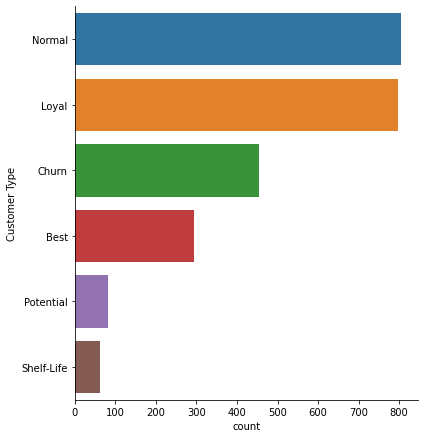

In [45]:
print(rfmModel_merged['Customer Type'].value_counts())
print("\n")
sns.catplot(y = "Customer Type", data = rfmModel_merged, kind = "count", height = 6, order = rfmModel_merged['Customer Type'].value_counts().index)

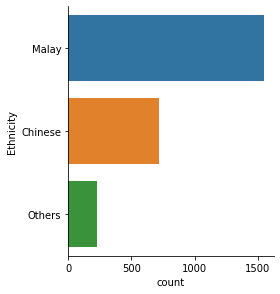

In [46]:
sns.catplot(y = "Ethnicity", data = rfmModel_merged, kind = "count", height = 4, order = rfmModel_merged['Ethnicity'].value_counts().index)

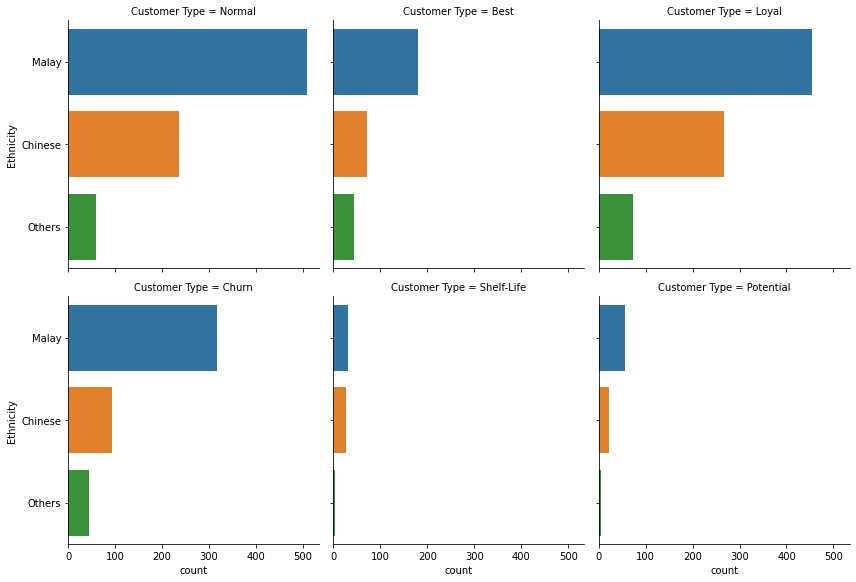

In [47]:
sns.catplot(y = "Ethnicity", data = rfmModel_merged, kind = "count", col = 'Customer Type', col_wrap = 3, height = 4, order = rfmModel_merged['Ethnicity'].value_counts().index)

The distribution of each customer category by ethnicity was expected since this dataset was meant to be representative of Malaysia's population. 

However, as the primary ethnicity in Malaysia (which are Malays) have a much larger population than other ethnicities, we should rely on proportion for each customer category rather than sheer numbers.

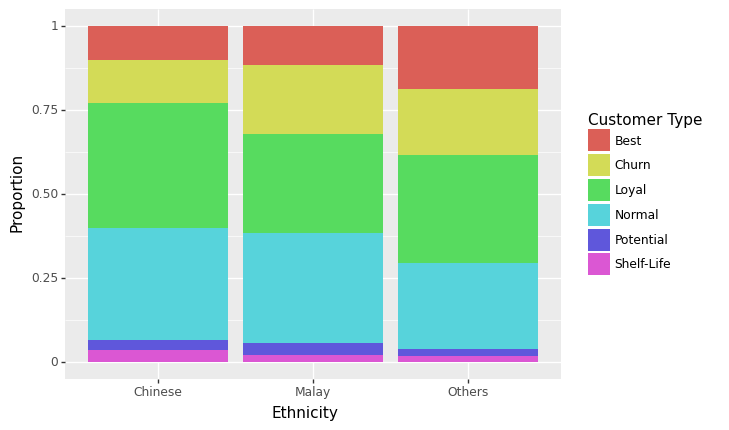

<ggplot: (-9223363286564622304)>

In [48]:
ggplot(rfmModel_merged) + geom_bar(mapping = aes(x = 'Ethnicity', fill = 'Customer Type'), position = "fill") + labs(y = "Proportion")

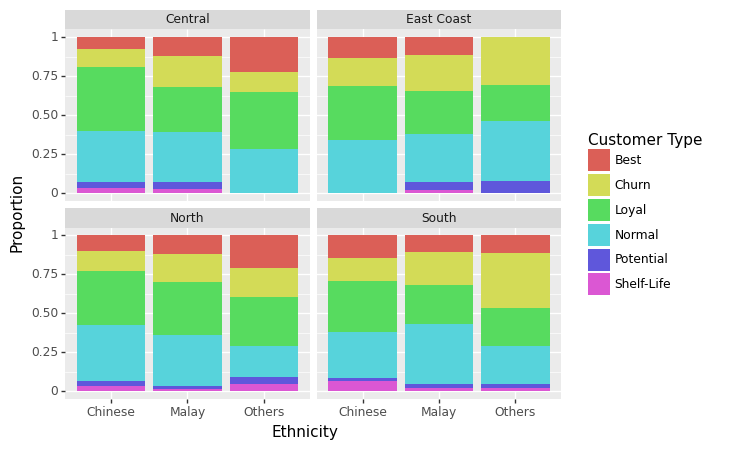

<ggplot: (-9223363286564602431)>

In [49]:
ggplot(rfmModel_merged) + geom_bar(mapping = aes(x = 'Ethnicity', fill = 'Customer Type'), position = "fill") + labs(y = "Proportion") + facet_wrap(facets = "location", ncol=2)

One example of an observation we can make is that there seems to be to be a slightly higher proportion of Malay customers than Chinese customers who have churned, regardless of the location. We might be able to find a reason of why would that be the case later.

We should also look at the top and bottom few products of each year to see what the customers prefer (or don't prefer) overall.

In [50]:
year1_spend = transactions_clean_year1[['Panel ID', 'Category', 'Spend']].groupby('Category').sum().sort_values(by = 'Spend', ascending = False).reset_index()
year1_spend

,Category,Spend
0,Rice,564020.7
1,Milk Powder-Kids,313993.0
2,Eggs,255787.6
3,Cooking Oils,243519.1
4,Tonic Food Drink,209687.2
...,...,...
57,Savoury Spread,4069.5
58,RTD Coffee,4042.2
59,Belacan,3679.8
60,Energy Drinks,2999.0


In [51]:
year2_spend = transactions_clean_year2[['Panel ID', 'Category', 'Spend']].groupby('Category').sum().sort_values(by = 'Spend', ascending = False).reset_index()[:-1] # avoid psuedo-category
year2_spend

,Category,Spend
0,Rice,544853.7
1,Eggs,264390.7
2,Milk Powder-Kids,253384.9
3,Cooking Oils,232659.7
4,Tonic Food Drink,202431.6
...,...,...
57,Baby Cereal,3877.9
58,RTD Coffee,3822.9
59,Belacan,3159.2
60,Energy Drinks,1993.6


Expectedly, a majority of the top selling items in both years are staple goods, cooking essentials, or baby care products. These are normal purchases that customers make from supermarkets, and should continue to be the top selling items consistently. The bottom products are mostly not as essential in one's daily living. 

To facilitate our analysis, it might be more helpful to group these products into their respective field of goods they belong in.

In [52]:
categories['Category'].unique()

array(['Baby Cereal', 'Beer', 'Belacan', 'Bird Nest', 'Biscuits',
       'Bouilon', 'Butter', 'Cake', 'Canned Product', 'Cereal Beverage',
       'Cereals', 'Cheese', 'Chicken Essence', 'Choc/Nut Spread',
       'Chocolate', 'Coconut Milk', 'Coffee', 'Condensed/Evap Milk',
       'Confectionery', 'Cooking Oils', 'Cooking Sauces', 'Cordials',
       'Creamer', 'CSD', 'Cultured Milk', 'Drinking Water', 'Eggs',
       'Energy Drinks', 'Flour', 'Frozen Food', 'Fruit/Veg Juices',
       'Ghee', 'Honey', 'Ice Cream', 'Instant Noodles', 'Instant Soup',
       'Isotonic Drinks', 'Jam', 'Kaya', 'Liquid Milk', 'Margarine',
       'Milk Powder-Adult', 'Milk Powder-Infant', 'Milk Powder-Kids',
       'MSG', 'Peanut Butter', 'Rice', 'RTD Coffee', 'RTD Tea',
       'Salad Dressing', 'Savoury Spread', 'Seasoning Powder', 'Snack',
       'Soy Milk', 'Spagetti', 'Spirits', 'Sugar', 'Tea',
       'Tonic Food Drink', 'Wine', 'Yoghurt Drink', 'Yoghurts'],
      dtype=object)

In [53]:
beverages = ['CSD', 'Tonic Food Drink', 'Coffee', 'Isotonic Drinks', 'Cordials', 'Creamer', 'Soy Milk', 'RTD Coffee', 'RTD Tea',
            'Tea', 'Fruit/Veg Juices', 'Yoghurt Drink', 'Cultured Milk', 'Drinking Water', 'Beer', 'Energy Drinks', 'Spirits', 'Wine']

babyCare = ['Baby Cereal', 'Milk Powder-Infant']

packagedFood = ['Canned Product', 'Frozen Food', 'Ice Cream', 'Cake', 'Biscuits', 'Instant Noodles', 'Chocolate', 'Snack',
                'Spagetti', 'Instant Soup', 'Confectionery', 'Yoghurts']

stapleGoods = ['Rice', 'Liquid Milk', 'Eggs', 'Cereals', 'Cereal Beverage', 'Milk Powder-Adult', 'Milk Powder-Kids']

cookingEssentials = ['Seasoning Powder', 'Cooking Oils', 'Coconut Milk', 'Cooking Sauces', 'Bouilon', 'Belacan',
                      'Condensed/Evap Milk', 'Ghee', 'Honey', 'MSG']

bakingOrSpreads = ['Kaya', 'Margarine', 'Flour', 'Sugar', 'Peanut Butter', 'Salad Dressing', 'Jam', 'Savoury Spread', 
                   'Butter', 'Choc/Nut Spread', 'Cheese']

otherProducts = ['Chicken Essence', 'Bird Nest']

In [54]:
def classify_product(x):
  if x in beverages:
    return 'Beverages'
  elif x in babyCare:
    return 'Baby Care'
  elif x in packagedFood:
    return 'Packaged Food'
  elif x in stapleGoods:
    return 'Staple Goods'
  elif x in cookingEssentials:
    return 'Cooking Essentials'
  elif x in bakingOrSpreads:
    return 'Baking Products/Spreads'
  elif x in otherProducts:
    return 'Other Products'

In [55]:
categories['Product Type'] = categories['Category'].apply(classify_product)

We can finally begin to examine each customer type more closely.

#### Loyal Customers Analysis

First off, we want to find out more about what our `Loyal` customers have in common. 

In [56]:
loyal = rfmModel_merged[rfmModel_merged['Customer Type'] == 'Loyal']

Now that we have our `Loyal` customers, we can use their `Panel ID` to have a look at their purchases over the two years.

In [57]:
loyal_IDs = loyal['Panel ID'].unique()

loyal_dataset1 = transactions_clean_year1[transactions_clean_year1['Panel ID'].isin(loyal_IDs)]
loyal_dataset2 = transactions_clean_year2[transactions_clean_year2['Panel ID'].isin(loyal_IDs)]

Now here comes the exciting part: what do `Loyal` customers keep buying? What entices them to come back? We can have a look at the few products which might have kept their loyalty so that we ensure that these products are always well-stocked so that our `Loyal` customers can keep purchasing them.

We can answer this by looking at the top few products that `Loyal` customers purchase.

In [58]:
loyal_transactions = transactions_clean[transactions_clean['Panel ID'].isin(loyal_IDs)]
loyal_transactions[['Category', 'Spend']].groupby('Category').sum().reset_index().sort_values(by = 'Spend', ascending = False)

,Category,Spend
48,Rice,453000.6
26,Eggs,210831.5
20,Cooking Oils,201960.8
44,Milk Powder-Kids,199383.2
58,Tonic Food Drink,176603.3
...,...,...
46,RTD Coffee,3412.0
2,Belacan,3012.8
0,Baby Cereal,2112.9
23,Creamer,1653.5


In [59]:
loyal_year1= loyal_dataset1.groupby('Category').sum().sort_values(by = 'Spend', ascending = False).reset_index()
loyal_year1.loc[:, 'Average Spend'] = loyal_year1['Spend'] /  (loyal['Panel ID'].nunique())
loyal_year1.rename(columns = {'Pack Size': 'PS1', 'Volume': 'Volume1', 'Spend': 'Spend1', 'Average Spend': 'avg_spend1'}, inplace=True)

In [60]:
loyal_year2 = loyal_dataset2.groupby('Category').sum().sort_values(by = 'Spend', ascending = False).reset_index()
loyal_year2.loc[:, 'Average Spend'] = loyal_year2['Spend'] /  (loyal['Panel ID'].nunique())
loyal_year2.rename(columns = {'Pack Size': 'PS2', 'Volume': 'Volume2', 'Spend': 'Spend2', 'Average Spend': 'avg_spend2'}, inplace=True)

In [61]:
# Product statistics from loyal customers over both years
loyal_products = loyal_year1.merge(loyal_year2, how = 'left', on = 'Category')

In [62]:
# fill the NAs with zeroes (for products which have not been purchased at all for each year)
loyal_products.fillna(0.0, inplace=True)

In [63]:
loyal_products.loc[:, 'spend_diff_%'] = (loyal_products['Spend2'] - loyal_products['Spend1'])*100 / loyal_products['Spend1']
loyal_products['Product Type'] = loyal_products['Category'].apply(classify_product)
loyal_products.sort_values(by = 'spend_diff_%', ascending=False)

,Category,PS1,Volume1,Spend1,avg_spend1,PS2,Volume2,Spend2,avg_spend2,spend_diff_%,Product Type
57,Savoury Spread,280,55.1,1612.2,2.025377,360,68.3,2172.9,2.729774,34.778563,Baking Products/Spreads
19,Flour,9074,8036.0,19880.7,24.975754,10283,8751.3,24905.0,31.287688,25.272249,Baking Products/Spreads
42,Salad Dressing,844,294.1,5066.8,6.365327,1029,360.3,6205.2,7.795477,22.467830,Baking Products/Spreads
15,Canned Product,6805,2356.2,31628.8,39.734673,7845,2682.3,38411.4,48.255528,21.444380,Packaged Food
52,Jam,358,125.1,2509.7,3.152889,412,157.5,3044.7,3.825000,21.317289,Baking Products/Spreads
...,...,...,...,...,...,...,...,...,...,...,...
25,Isotonic Drinks,2968,6402.5,15071.0,18.933417,2278,4838.8,11937.7,14.997111,-20.790259,Beverages
21,Milk Powder-Infant,417,333.3,18010.6,22.626382,457,297.5,14166.9,17.797613,-21.341321,Baby Care
60,Creamer,150,70.8,938.2,1.178643,114,50.6,715.3,0.898618,-23.758260,Beverages
41,RTD Tea,1019,2036.9,5169.5,6.494347,830,1586.8,3876.4,4.869849,-25.014025,Beverages


#### Churned Customers Analysis

Customers who churn would usually have a reason to do so. Their transaction records (or lack thereof) would allow us to track the products they have purchased over the months, which might allow us to extract any patterns obtained from their spending habits. Coupled with their demographic information, they could provide reasons on why these customers churned.

We can start by obtaining the `Panel ID`s of customers who are suspected to have churned, by comparing the sales of each product in both years.

In [64]:
churn = rfmModel_merged[rfmModel_merged['Customer Type'] == 'Churn']

churn_IDs = churn['Panel ID'].unique()

churn_dataset1 = transactions_clean_year1[transactions_clean_year1['Panel ID'].isin(churn_IDs)]
churn_dataset2 = transactions_clean_year2[transactions_clean_year2['Panel ID'].isin(churn_IDs)]

In [65]:
churn_transactions = transactions_clean[transactions_clean['Panel ID'].isin(churn_IDs)]
churn_transactions[['Category', 'Spend']].groupby('Category').sum().reset_index().sort_values(by = 'Spend', ascending = False)

,Category,Spend
48,Rice,128937.0
44,Milk Powder-Kids,73914.7
26,Eggs,55063.0
20,Cooking Oils,49292.8
58,Tonic Food Drink,41875.9
...,...,...
2,Belacan,702.7
27,Energy Drinks,242.5
23,Creamer,107.8
55,Spirits,92.0


In [66]:
# purchase statistics of churned customers in first year
churn_year1 = churn_dataset1.groupby('Category').sum().sort_values(by = 'Spend', ascending = False).reset_index()
churn_year1.loc[:, 'Average Spend'] = churn_year1['Spend'] /  (churn['Panel ID'].nunique())
churn_year1.rename(columns = {'Pack Size': 'PS1', 'Volume': 'Volume1', 'Spend': 'Spend1', 'Average Spend': 'avg_spend1'}, inplace=True)
churn_year1[:10]

,Category,PS1,Volume1,Spend1,avg_spend1
0,Rice,3753,29559.0,85588.1,188.520044
1,Milk Powder-Kids,1613,1576.2,49504.1,109.039868
2,Eggs,4807,94824.0,36199.4,79.734361
3,Cooking Oils,4482,8747.3,33346.1,73.449559
4,Tonic Food Drink,2089,1820.4,28016.0,61.709251
5,Biscuits,6021,1695.0,25934.0,57.123348
6,Milk Powder-Adult,798,662.9,22258.1,49.026652
7,Frozen Food,2846,1741.3,20073.9,44.215639
8,Cooking Sauces,4015,2234.2,18413.4,40.558150
9,Sugar,6087,6109.8,17978.3,39.599780


In [67]:
# purchase statistics of churned customers in second year
churn_year2 = churn_dataset2.groupby('Category').sum().sort_values(by = 'Spend', ascending = False).reset_index()
churn_year2.loc[:, 'Average Spend'] = churn_year2['Spend'] /  (churn['Panel ID'].nunique())
churn_year2.rename(columns = {'Pack Size': 'PS2', 'Volume': 'Volume2', 'Spend': 'Spend2', 'Average Spend': 'avg_spend2'}, inplace=True)
churn_year2[:10]

,Category,PS2,Volume2,Spend2,avg_spend2
0,Rice,1896,15045.1,43348.9,95.482159
1,Milk Powder-Kids,913,847.9,24410.6,53.767841
2,Eggs,2406,50772.0,18863.6,41.549780
3,Cooking Oils,2119,4147.5,15946.7,35.124890
4,Biscuits,3184,911.2,14092.9,31.041630
5,Tonic Food Drink,1009,966.6,13859.9,30.528414
6,Milk Powder-Adult,402,358.3,10873.1,23.949559
7,Frozen Food,1479,872.6,10373.7,22.849559
8,Sugar,3068,3121.3,8945.3,19.703304
9,Condensed/Evap Milk,3494,1851.6,8817.3,19.421366


In [68]:
# Product statistics from churned customers over both years
churn_products = churn_year1.merge(churn_year2, how = 'left', on = 'Category')
churn_products

,Category,PS1,Volume1,Spend1,avg_spend1,PS2,Volume2,Spend2,avg_spend2
0,Rice,3753,29559.0,85588.1,188.520044,1896.0,15045.1,43348.9,95.482159
1,Milk Powder-Kids,1613,1576.2,49504.1,109.039868,913.0,847.9,24410.6,53.767841
2,Eggs,4807,94824.0,36199.4,79.734361,2406.0,50772.0,18863.6,41.549780
3,Cooking Oils,4482,8747.3,33346.1,73.449559,2119.0,4147.5,15946.7,35.124890
4,Tonic Food Drink,2089,1820.4,28016.0,61.709251,1009.0,966.6,13859.9,30.528414
...,...,...,...,...,...,...,...,...,...
56,Belacan,184,10.7,444.8,0.979736,87.0,6.9,257.9,0.568062
57,Energy Drinks,59,16.5,161.3,0.355286,33.0,9.7,81.2,0.178855
58,Creamer,16,7.4,107.8,0.237445,NaN,NaN,NaN,NaN
59,Bird Nest,15,1.1,102.2,0.225110,158.0,12.1,988.0,2.176211


In [69]:
# fill the NAs with zeroes (for products which have not been purchased at all for each year)
churn_products.fillna(0.0, inplace=True)
churn_products

,Category,PS1,Volume1,Spend1,avg_spend1,PS2,Volume2,Spend2,avg_spend2
0,Rice,3753,29559.0,85588.1,188.520044,1896.0,15045.1,43348.9,95.482159
1,Milk Powder-Kids,1613,1576.2,49504.1,109.039868,913.0,847.9,24410.6,53.767841
2,Eggs,4807,94824.0,36199.4,79.734361,2406.0,50772.0,18863.6,41.549780
3,Cooking Oils,4482,8747.3,33346.1,73.449559,2119.0,4147.5,15946.7,35.124890
4,Tonic Food Drink,2089,1820.4,28016.0,61.709251,1009.0,966.6,13859.9,30.528414
...,...,...,...,...,...,...,...,...,...
56,Belacan,184,10.7,444.8,0.979736,87.0,6.9,257.9,0.568062
57,Energy Drinks,59,16.5,161.3,0.355286,33.0,9.7,81.2,0.178855
58,Creamer,16,7.4,107.8,0.237445,0.0,0.0,0.0,0.000000
59,Bird Nest,15,1.1,102.2,0.225110,158.0,12.1,988.0,2.176211


In [70]:
churn_products.loc[:, 'spend_diff_%'] = (churn_products['Spend2'] - churn_products['Spend1'])*100 / churn_products['Spend1']
churn_products['Product Type'] = churn_products['Category'].apply(classify_product)
churn_products.sort_values(by = 'spend_diff_%', ascending=False)

,Category,PS1,Volume1,Spend1,avg_spend1,PS2,Volume2,Spend2,avg_spend2,spend_diff_%,Product Type
59,Bird Nest,15,1.1,102.2,0.225110,158.0,12.1,988.0,2.176211,866.731898,Other Products
51,Chicken Essence,15,10.1,839.6,1.849339,8.0,5.5,706.7,1.556608,-15.828966,Other Products
50,Kaya,258,60.7,874.3,1.925771,175.0,36.8,595.2,1.311013,-31.922681,Baking Products/Spreads
15,Canned Product,2008,697.5,9851.4,21.699119,1375.0,462.1,6490.5,14.296256,-34.115963,Packaged Food
52,RTD Coffee,265,102.7,753.3,1.659251,187.0,54.4,480.6,1.058590,-36.200717,Beverages
...,...,...,...,...,...,...,...,...,...,...,...
53,Instant Soup,127,43.8,661.8,1.457709,35.0,11.7,200.8,0.442291,-69.658507,Packaged Food
35,Butter,413,158.1,3142.8,6.922467,137.0,44.2,921.3,2.029295,-70.685376,Baking Products/Spreads
27,Beer,209,366.0,4086.2,9.000441,23.0,57.0,694.6,1.529956,-83.001322,Beverages
58,Creamer,16,7.4,107.8,0.237445,0.0,0.0,0.0,0.000000,-100.000000,Beverages


We then find the average increase/decrease in spending on each `Product Type` (by percentage). 

In [71]:
churn_spend_diffs = churn_products[churn_products['Product Type'] != 'Other Products'].groupby('Product Type')['spend_diff_%'].mean().reset_index()
churn_spend_diffs.sort_values(by = 'spend_diff_%', ascending=False)

,Product Type,spend_diff_%
0,Baby Care,-43.040332
1,Baking Products/Spreads,-50.402643
4,Packaged Food,-51.187283
3,Cooking Essentials,-52.494811
5,Staple Goods,-52.993905
2,Beverages,-61.739023


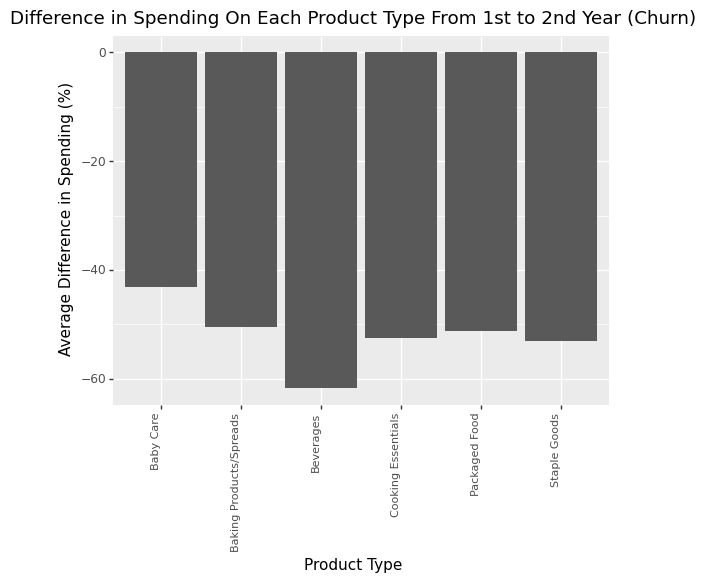

<ggplot: (8750284472647)>

In [72]:
ggplot(churn_spend_diffs) + geom_col(mapping = aes(x = 'Product Type', y = 'spend_diff_%')) + labs(title = "Difference in Spending On Each Product Type From 1st to 2nd Year (Churn)" , y = "Average Difference in Spending (%)") + theme(axis_text_x=element_text(angle=90, hjust=1, size=8))

For all `Product Type`s, there is at least a 40% drop in sales from the 1st Year to the 2nd Year for customers who are suspected to have churned.

Could it be that consumers find the prices too expensive? Could it be customer dissatisfaction which might stem from somewhere else?

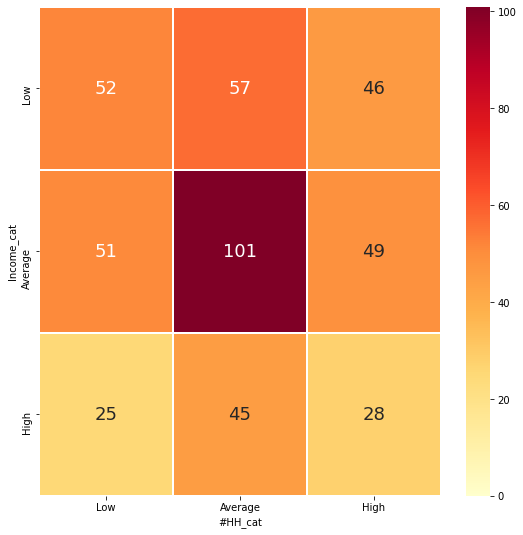

In [73]:
churn_IncomeHousing = churn.groupby(['Income_cat', '#HH_cat']).count().reset_index()[['Income_cat', '#HH_cat', 'Panel ID']]
churn_IncomeHousing.rename(columns = {'Panel ID': 'Count'}, inplace=True)
churn_IncomeHousing = churn_IncomeHousing.pivot("Income_cat", "#HH_cat", "Count")

plt.figure(figsize=(9, 9))
sns.heatmap(churn_IncomeHousing, linewidths = 1, vmin=0,
           annot = True, fmt = ".0f", annot_kws = {"size": 18}, cmap = "YlOrRd")

It seems surprising that the group with the greatest number of customer churns are those who have an average income and an average number of people in their household.

However, this could be because it might be more common for people to have an average income / average number of people in the household, which might cause the number of customer churns to inflate. If we note the orange shades of the customers groups who have low to average income, and two out of the three groups having a yellow shade, it might a sign that the prices of the products are not competitive enough. 

Moreover, less essential product types like Beverages had an average decrease in annual sales by 61%, as compared to more essential products such as Baby Care products, which plummeted by 43%. This is another indication that the customers are only spending on essential items whenever they shop, and would want to save cost. 

#### Best Customers Analysis

What motivates these best customers to keep being the best for our client? There must be a few strong driving factors that incentivises them. Is it the convenience of the shops which they make purchases from? The friendly customer service? Or prices which they deem suitable?

In [74]:
best = rfmModel_merged[rfmModel_merged['Customer Type'] == 'Best']
best_IDs = best['Panel ID'].unique()

best_dataset1 = transactions_clean_year1[transactions_clean_year1['Panel ID'].isin(best_IDs)]
best_dataset2 = transactions_clean_year2[transactions_clean_year2['Panel ID'].isin(best_IDs)]

In [75]:
best_transactions = transactions_clean[transactions_clean['Panel ID'].isin(best_IDs)]
best_transactions[['Category', 'Spend']].groupby('Category').sum().reset_index().sort_values(by = 'Spend', ascending = False)

,Category,Spend
48,Rice,250012.8
44,Milk Powder-Kids,134970.7
26,Eggs,130405.5
29,Frozen Food,113317.8
4,Biscuits,110890.3
...,...,...
0,Baby Cereal,2059.7
46,RTD Coffee,1822.9
2,Belacan,1794.4
27,Energy Drinks,1679.7


In [76]:
best_year1= best_dataset1.groupby('Category').sum().sort_values(by = 'Spend', ascending = False).reset_index()
best_year1.loc[:, 'Average Spend'] = best_year1['Spend'] /  (best['Panel ID'].nunique())
best_year1.rename(columns = {'Pack Size': 'PS1', 'Volume': 'Volume1', 'Spend': 'Spend1', 'Average Spend': 'avg_spend1'}, inplace=True)
best_year1[:10]

,Category,PS1,Volume1,Spend1,avg_spend1
0,Rice,5241,40355.2,118921.1,404.493537
1,Milk Powder-Kids,2130,2077.1,67652.7,230.111224
2,Eggs,7628,153785.0,59108.6,201.049660
3,Biscuits,12256,3141.4,50235.4,170.868707
4,Frozen Food,7292,4307.3,50130.7,170.512585
5,Cooking Oils,6637,12623.4,48703.4,165.657823
6,Tonic Food Drink,4069,2891.3,43055.1,146.445918
7,Milk Powder-Adult,1515,1244.6,40565.1,137.976531
8,Coffee,5698,1373.7,34637.2,117.813605
9,Sugar,10496,10380.1,31320.0,106.530612


In [77]:
best_year2 = best_dataset2.groupby('Category').sum().sort_values(by = 'Spend', ascending = False).reset_index()
best_year2.loc[:, 'Average Spend'] = best_year2['Spend'] /  (best['Panel ID'].nunique())
best_year2.rename(columns = {'Pack Size': 'PS2', 'Volume': 'Volume2', 'Spend': 'Spend2', 'Average Spend': 'avg_spend2'}, inplace=True)
best_year2[:10]

,Category,PS2,Volume2,Spend2,avg_spend2
0,Rice,5754,43572.5,131091.7,445.890136
1,Eggs,8879,192869.0,71296.9,242.506463
2,Milk Powder-Kids,2094,2089.0,67318.0,228.972789
3,Frozen Food,9036,5239.3,63187.1,214.922109
4,Biscuits,13920,3813.0,60654.9,206.309184
5,Cooking Oils,7561,14548.7,56930.0,193.639456
6,Tonic Food Drink,4594,3358.1,50798.8,172.785034
7,Milk Powder-Adult,2015,1422.0,47068.5,160.096939
8,Instant Noodles,10123,36248.9,39648.4,134.858503
9,Coffee,6892,1479.2,39103.0,133.003401


In [78]:
# Product statistics from loyal customers over both years
best_products = best_year1.merge(best_year2, how = 'left', on = 'Category')
best_products

,Category,PS1,Volume1,Spend1,avg_spend1,PS2,Volume2,Spend2,avg_spend2
0,Rice,5241,40355.2,118921.1,404.493537,5754,43572.5,131091.7,445.890136
1,Milk Powder-Kids,2130,2077.1,67652.7,230.111224,2094,2089.0,67318.0,228.972789
2,Eggs,7628,153785.0,59108.6,201.049660,8879,192869.0,71296.9,242.506463
3,Biscuits,12256,3141.4,50235.4,170.868707,13920,3813.0,60654.9,206.309184
4,Frozen Food,7292,4307.3,50130.7,170.512585,9036,5239.3,63187.1,214.922109
...,...,...,...,...,...,...,...,...,...
57,Baby Cereal,85,36.4,931.6,3.168707,103,41.5,1128.1,3.837075
58,RTD Coffee,301,112.1,924.1,3.143197,273,103.0,898.8,3.057143
59,Belacan,305,26.9,873.5,2.971088,329,26.3,920.9,3.132313
60,Energy Drinks,279,81.2,791.8,2.693197,229,89.2,887.9,3.020068


In [79]:
# fill the NAs with zeroes (for products which have not been purchased at all for each year)
best_products.fillna(0.0, inplace=True)

In [80]:
best_products.loc[:, 'spend_diff_%'] = (best_products['Spend2'] - best_products['Spend1'])*100 / best_products['Spend1']
best_products['Product Type'] = best_products['Category'].apply(classify_product)
best_products.sort_values(by = 'spend_diff_%', ascending=False)

,Category,PS1,Volume1,Spend1,avg_spend1,PS2,Volume2,Spend2,avg_spend2,spend_diff_%,Product Type
30,Milk Powder-Infant,185,140.0,8262.2,28.102721,419,251.4,13008.0,44.244898,57.439907,Baby Care
49,Chicken Essence,119,41.6,2961.6,10.073469,133,64.4,4536.0,15.428571,53.160454,Other Products
21,Flour,5549,4815.9,12834.9,43.656122,7269,6153.5,18912.4,64.327891,47.351362,Baking Products/Spreads
15,Canned Product,4480,1603.9,22703.0,77.221088,6090,2154.7,30822.7,104.839116,35.764877,Packaged Food
14,Liquid Milk,4471,4147.3,25174.6,85.627891,6174,5553.8,33924.0,115.387755,34.754872,Staple Goods
...,...,...,...,...,...,...,...,...,...,...,...
44,Ghee,231,89.1,3727.6,12.678912,221,76.0,3431.3,11.671088,-7.948814,Cooking Essentials
23,Beer,848,866.4,11718.3,39.858163,469,752.6,10698.8,36.390476,-8.700067,Beverages
46,Wine,66,61.5,3502.0,11.911565,75,47.6,3122.6,10.621088,-10.833809,Beverages
29,CSD,3091,4203.8,8891.6,30.243537,2774,3527.9,7634.6,25.968027,-14.136938,Beverages


#### "Shelf-Life" Customers Analysis

As explained earlier, these are the customers who are suspected to be buying items which have a longer shelf life on average, and therefore would make less frequent or recent visits. However, they do spend just as much if not more money on the client on the very few times they visit, which makes these customers just as valuable.

In [81]:
shelfLife = rfmModel_merged[rfmModel_merged['Customer Type'] == 'Shelf-Life']
shelfLife_IDs = shelfLife['Panel ID'].unique()

shelfLife_dataset1 = transactions_clean_year1[transactions_clean_year1['Panel ID'].isin(shelfLife_IDs)]
shelfLife_dataset2 = transactions_clean_year2[transactions_clean_year2['Panel ID'].isin(shelfLife_IDs)]

In [82]:
shelfLife_transactions = transactions_clean[transactions_clean['Panel ID'].isin(shelfLife_IDs)]
shelfLife_transactions[['Category', 'Spend']].groupby('Category').sum().reset_index().sort_values(by = 'Spend', ascending = False)

,Category,Spend
44,Milk Powder-Kids,46990.2
48,Rice,38109.2
20,Cooking Oils,16544.6
26,Eggs,15750.7
58,Tonic Food Drink,13956.7
...,...,...
50,Savoury Spread,279.4
2,Belacan,279.3
37,Jam,182.9
23,Creamer,60.6


In [83]:
shelfLife_year1= shelfLife_dataset1.groupby('Category').sum().sort_values(by = 'Spend', ascending = False).reset_index()
shelfLife_year1.loc[:, 'Average Spend'] = shelfLife_year1['Spend'] /  (shelfLife['Panel ID'].nunique())
shelfLife_year1.rename(columns = {'Pack Size': 'PS1', 'Volume': 'Volume1', 'Spend': 'Spend1', 'Average Spend': 'avg_spend1'}, inplace=True)
shelfLife_year1[:10]

,Category,PS1,Volume1,Spend1,avg_spend1
0,Milk Powder-Kids,398,429.1,19233.8,310.222581
1,Rice,726,5812.4,18186.3,293.327419
2,Cooking Oils,927,2145.0,8644.5,139.427419
3,Eggs,1004,19579.0,7761.9,125.191935
4,Tonic Food Drink,563,493.1,7068.8,114.012903
5,Biscuits,1381,428.3,6468.7,104.333871
6,Milk Powder-Adult,191,152.5,5293.5,85.379032
7,Milk Powder-Infant,110,93.7,4794.2,77.325806
8,Liquid Milk,928,869.0,4570.6,73.719355
9,Cooking Sauces,907,498.6,4293.7,69.253226


In [84]:
shelfLife_year2 = shelfLife_dataset2.groupby('Category').sum().sort_values(by = 'Spend', ascending = False).reset_index()
shelfLife_year2.loc[:, 'Average Spend'] = shelfLife_year2['Spend'] /  (shelfLife['Panel ID'].nunique())
shelfLife_year2.rename(columns = {'Pack Size': 'PS2', 'Volume': 'Volume2', 'Spend': 'Spend2', 'Average Spend': 'avg_spend2'}, inplace=True)
shelfLife_year2[:10]

,Category,PS2,Volume2,Spend2,avg_spend2
0,Milk Powder-Kids,571,594.5,27756.4,447.683871
1,Rice,769,6180.3,19922.9,321.337097
2,Eggs,1006,20744.0,7988.8,128.851613
3,Cooking Oils,852,2093.9,7900.1,127.420968
4,Tonic Food Drink,488,453.1,6887.9,111.095161
5,Biscuits,1424,417.0,6386.6,103.009677
6,Cooking Sauces,934,501.3,4415.7,71.220968
7,Milk Powder-Adult,154,157.0,4269.6,68.864516
8,Sugar,1349,1395.8,4131.0,66.629032
9,Beer,73,288.6,4109.4,66.280645


In [85]:
# Product statistics from loyal customers over both years
shelfLife_products = shelfLife_year1.merge(shelfLife_year2, how = 'left', on = 'Category')
shelfLife_products

,Category,PS1,Volume1,Spend1,avg_spend1,PS2,Volume2,Spend2,avg_spend2
0,Milk Powder-Kids,398,429.1,19233.8,310.222581,571.0,594.5,27756.4,447.683871
1,Rice,726,5812.4,18186.3,293.327419,769.0,6180.3,19922.9,321.337097
2,Cooking Oils,927,2145.0,8644.5,139.427419,852.0,2093.9,7900.1,127.420968
3,Eggs,1004,19579.0,7761.9,125.191935,1006.0,20744.0,7988.8,128.851613
4,Tonic Food Drink,563,493.1,7068.8,114.012903,488.0,453.1,6887.9,111.095161
...,...,...,...,...,...,...,...,...,...
57,Ghee,14,2.2,126.4,2.038710,6.0,2.5,153.2,2.470968
58,Wine,7,4.7,64.7,1.043548,8.0,7.5,250.0,4.032258
59,Creamer,10,4.8,60.6,0.977419,NaN,NaN,NaN,NaN
60,Bird Nest,12,0.8,36.0,0.580645,8.0,1.1,275.0,4.435484


In [86]:
# fill the NAs with zeroes (for products which have not been purchased at all for each year)
shelfLife_products.fillna(0.0, inplace=True)

In [87]:
shelfLife_products.loc[:, 'spend_diff_%'] = (shelfLife_products['Spend2'] - shelfLife_products['Spend1'])*100 / shelfLife_products['Spend1']
shelfLife_products['Product Type'] = shelfLife_products['Category'].apply(classify_product)
shelfLife_products.sort_values(by = 'spend_diff_%', ascending=False)

,Category,PS1,Volume1,Spend1,avg_spend1,PS2,Volume2,Spend2,avg_spend2,spend_diff_%,Product Type
60,Bird Nest,12,0.8,36.0,0.580645,8.0,1.1,275.0,4.435484,663.888889,Other Products
58,Wine,7,4.7,64.7,1.043548,8.0,7.5,250.0,4.032258,286.398764,Beverages
0,Milk Powder-Kids,398,429.1,19233.8,310.222581,571.0,594.5,27756.4,447.683871,44.310537,Staple Goods
49,Spagetti,75,34.2,251.3,4.053226,99.0,43.8,352.6,5.687097,40.310386,Packaged Food
54,Choc/Nut Spread,11,4.0,157.1,2.533871,16.0,5.6,214.2,3.454839,36.346276,Baking Products/Spreads
...,...,...,...,...,...,...,...,...,...,...,...
52,Belacan,65,1.2,203.8,3.287097,35.0,0.8,75.5,1.217742,-62.953876,Cooking Essentials
56,Jam,21,7.0,133.9,2.159677,7.0,2.8,49.0,0.790323,-63.405527,Baking Products/Spreads
61,Energy Drinks,10,3.9,35.4,0.570968,4.0,1.2,11.1,0.179032,-68.644068,Beverages
38,Baby Cereal,48,15.4,628.5,10.137097,6.0,3.0,71.3,1.150000,-88.655529,Baby Care


#### "Potential" Customers Analysis

These are the customers who show the greatest potential of either becoming Loyal or Best customers. These customers should not be neglected as their sharp increase either their frequency / recency of visits, or the amount they spend on the client is a testament that they are customers who are willing to go the extra mile to promote the client's business. Their contributions should not go unrecognised.

In [88]:
potential = rfmModel_merged[rfmModel_merged['Customer Type'] == 'Potential']
potential_IDs = potential['Panel ID'].unique()

potential_dataset1 = transactions_clean_year1[transactions_clean_year1['Panel ID'].isin(potential_IDs)]
potential_dataset2 = transactions_clean_year2[transactions_clean_year2['Panel ID'].isin(potential_IDs)]

In [89]:
potential_transactions = transactions_clean[transactions_clean['Panel ID'].isin(potential_IDs)]
potential_transactions[['Category', 'Spend']].groupby('Category').sum().reset_index().sort_values(by = 'Spend', ascending = False)

,Category,Spend
48,Rice,22859.5
44,Milk Powder-Kids,15621.0
26,Eggs,13112.0
43,Milk Powder-Infant,11261.1
4,Biscuits,10863.5
...,...,...
31,Ghee,187.9
55,Spirits,159.0
46,RTD Coffee,130.3
2,Belacan,112.0


In [90]:
potential_year1= potential_dataset1.groupby('Category').sum().sort_values(by = 'Spend', ascending = False).reset_index()
potential_year1.loc[:, 'Average Spend'] = potential_year1['Spend'] /  (potential['Panel ID'].nunique())
potential_year1.rename(columns = {'Pack Size': 'PS1', 'Volume': 'Volume1', 'Spend': 'Spend1', 'Average Spend': 'avg_spend1'}, inplace=True)
potential_year1[:10]

,Category,PS1,Volume1,Spend1,avg_spend1
0,Rice,247,1785.3,5631.5,67.849398
1,Milk Powder-Kids,124,114.7,3615.1,43.555422
2,Tonic Food Drink,196,211.3,3155.3,38.015663
3,Eggs,382,7526.0,2939.0,35.409639
4,Biscuits,564,169.9,2632.6,31.718072
5,Milk Powder-Infant,61,59.0,2613.8,31.491566
6,Cooking Oils,324,636.4,2411.6,29.055422
7,Frozen Food,249,165.6,1986.9,23.938554
8,Milk Powder-Adult,70,39.0,1427.6,17.200000
9,Instant Noodles,319,1220.0,1317.3,15.871084


In [91]:
potential_year2 = potential_dataset2.groupby('Category').sum().sort_values(by = 'Spend', ascending = False).reset_index()
potential_year2.loc[:, 'Average Spend'] = potential_year2['Spend'] /  (potential['Panel ID'].nunique())
potential_year2.rename(columns = {'Pack Size': 'PS2', 'Volume': 'Volume2', 'Spend': 'Spend2', 'Average Spend': 'avg_spend2'}, inplace=True)
potential_year2[:10]

,Category,PS2,Volume2,Spend2,avg_spend2
0,Rice,761,5558.6,17228.0,207.566265
1,Milk Powder-Kids,380,356.1,12005.9,144.649398
2,Eggs,1226,27186.0,10173.0,122.566265
3,Milk Powder-Infant,324,197.2,8647.3,104.184337
4,Biscuits,1847,513.6,8230.9,99.167470
5,Cooking Oils,1411,2250.9,8122.1,97.856627
6,Tonic Food Drink,492,461.9,7230.8,87.118072
7,Frozen Food,879,487.8,6367.2,76.713253
8,Liquid Milk,870,789.8,4944.1,59.567470
9,Sugar,1635,1654.6,4843.5,58.355422


In [92]:
# Product statistics from loyal customers over both years
potential_products = potential_year1.merge(potential_year2, how = 'left', on = 'Category')
potential_products[:10]

,Category,PS1,Volume1,Spend1,avg_spend1,PS2,Volume2,Spend2,avg_spend2
0,Rice,247,1785.3,5631.5,67.849398,761,5558.6,17228.0,207.566265
1,Milk Powder-Kids,124,114.7,3615.1,43.555422,380,356.1,12005.9,144.649398
2,Tonic Food Drink,196,211.3,3155.3,38.015663,492,461.9,7230.8,87.118072
3,Eggs,382,7526.0,2939.0,35.409639,1226,27186.0,10173.0,122.566265
4,Biscuits,564,169.9,2632.6,31.718072,1847,513.6,8230.9,99.167470
5,Milk Powder-Infant,61,59.0,2613.8,31.491566,324,197.2,8647.3,104.184337
6,Cooking Oils,324,636.4,2411.6,29.055422,1411,2250.9,8122.1,97.856627
7,Frozen Food,249,165.6,1986.9,23.938554,879,487.8,6367.2,76.713253
8,Milk Powder-Adult,70,39.0,1427.6,17.200000,183,132.6,4268.8,51.431325
9,Instant Noodles,319,1220.0,1317.3,15.871084,1150,4265.5,4597.0,55.385542


In [93]:
# fill the NAs with zeroes (for products which have not been purchased at all for each year)
potential_products.fillna(0.0, inplace=True)

In [94]:
potential_products.loc[:, 'spend_diff_%'] = (potential_products['Spend2'] - potential_products['Spend1'])*100 / potential_products['Spend1']
potential_products['Product Type'] = potential_products['Category'].apply(classify_product)
potential_products.sort_values(by = 'spend_diff_%', ascending=False).head()

,Category,PS1,Volume1,Spend1,avg_spend1,PS2,Volume2,Spend2,avg_spend2,spend_diff_%,Product Type
54,Savoury Spread,5,1.0,28.6,0.344578,33,6.1,236.1,2.844578,725.524476,Baking Products/Spreads
43,Cheese,16,4.8,172.2,2.074699,111,32.7,1217.8,14.672289,607.200929,Baking Products/Spreads
57,Instant Soup,5,1.5,24.4,0.293976,32,10.0,172.2,2.074699,605.737705,Packaged Food
53,MSG,18,1.6,35.9,0.432530,80,11.0,213.3,2.569880,494.150418,Cooking Essentials
50,Spagetti,32,13.2,104.1,1.254217,167,70.6,580.1,6.989157,457.252642,Packaged Food


In [95]:
potential_products.sort_values(by = 'spend_diff_%', ascending=False).tail()

,Category,PS1,Volume1,Spend1,avg_spend1,PS2,Volume2,Spend2,avg_spend2,spend_diff_%,Product Type
45,Honey,17,3.2,139.3,1.678313,16,8.5,238.1,2.868675,70.926059,Cooking Essentials
24,Isotonic Drinks,72,202.2,514.9,6.203614,170,274.0,714.0,8.602410,38.667702,Beverages
41,RTD Tea,38,68.4,206.9,2.492771,46,90.5,229.3,2.762651,10.826486,Beverages
38,Chicken Essence,5,2.4,229.0,2.759036,3,3.0,218.8,2.636145,-4.454148,Other Products
16,Energy Drinks,18,46.8,1017.4,12.257831,16,24.3,464.7,5.598795,-54.324749,Beverages


#### Bonus: Normal Customers

We originally intended to not analyse them as they might arguably make the least significant changes as they have stayed as the average customer for 2 years. However, it might be worth doing some analysis on this category as well. 

In [96]:
normal = rfmModel_merged[rfmModel_merged['Customer Type'] == 'Normal']
normal_IDs = normal['Panel ID'].unique()

normal_dataset1 = transactions_clean_year1[transactions_clean_year1['Panel ID'].isin(normal_IDs)]
normal_dataset2 = transactions_clean_year2[transactions_clean_year2['Panel ID'].isin(normal_IDs)]

In [97]:
normal_transactions = transactions_clean[transactions_clean['Panel ID'].isin(normal_IDs)]
normal_transactions[['Category', 'Spend']].groupby('Category').sum().reset_index().sort_values(by = 'Spend', ascending = False)

,Category,Spend
48,Rice,215955.3
44,Milk Powder-Kids,96498.1
26,Eggs,95015.6
20,Cooking Oils,92213.5
58,Tonic Food Drink,75442.9
...,...,...
50,Savoury Spread,1278.6
46,RTD Coffee,975.1
2,Belacan,937.8
23,Creamer,657.4


In [98]:
normal_year1= normal_dataset1.groupby('Category').sum().sort_values(by = 'Spend', ascending = False).reset_index()
normal_year1.loc[:, 'Average Spend'] = normal_year1['Spend'] /  (normal['Panel ID'].nunique())
normal_year1.rename(columns = {'Pack Size': 'PS1', 'Volume': 'Volume1', 'Spend': 'Spend1', 'Average Spend': 'avg_spend1'}, inplace=True)

In [99]:
normal_year2 = normal_dataset2.groupby('Category').sum().sort_values(by = 'Spend', ascending = False).reset_index()
normal_year2.loc[:, 'Average Spend'] = normal_year2['Spend'] /  (normal['Panel ID'].nunique())
normal_year2.rename(columns = {'Pack Size': 'PS2', 'Volume': 'Volume2', 'Spend': 'Spend2', 'Average Spend': 'avg_spend2'}, inplace=True)

In [100]:
# Product statistics from loyal customers over both years
normal_products = normal_year1.merge(normal_year2, how = 'left', on = 'Category')

In [101]:
# fill the NAs with zeroes (for products which have not been purchased at all for each year)
normal_products.fillna(0.0, inplace=True)

In [102]:
normal_products.loc[:, 'spend_diff_%'] = (normal_products['Spend2'] - normal_products['Spend1'])*100 / normal_products['Spend1']
normal_products['Product Type'] = normal_products['Category'].apply(classify_product)
normal_products.sort_values(by = 'spend_diff_%', ascending=False)

,Category,PS1,Volume1,Spend1,avg_spend1,PS2,Volume2,Spend2,avg_spend2,spend_diff_%,Product Type
58,Savoury Spread,91,16.5,521.9,0.648323,125,22.4,756.7,0.940000,44.989462,Baking Products/Spreads
47,Wine,14,11.0,1745.0,2.167702,15,9.5,2325.8,2.889193,33.283668,Beverages
37,Cheese,241,76.7,2787.4,3.462609,307,100.8,3672.1,4.561615,31.739255,Baking Products/Spreads
48,Spagetti,474,216.1,1668.7,2.072919,591,265.9,2088.3,2.594161,25.145323,Packaged Food
25,Coconut Milk,1405,453.6,5142.0,6.387578,1754,544.9,6374.9,7.919130,23.977052,Cooking Essentials
...,...,...,...,...,...,...,...,...,...,...,...
53,Baby Cereal,115,40.2,1229.5,1.527329,63,23.5,643.1,0.798882,-47.694185,Baby Care
51,Confectionery,580,43.8,1306.6,1.623106,302,24.2,670.0,0.832298,-48.721874,Packaged Food
38,Chicken Essence,52,34.5,2462.1,3.058509,16,12.3,971.8,1.207205,-60.529629,Other Products
61,Energy Drinks,73,35.4,406.2,0.504596,50,19.2,157.7,0.195901,-61.176760,Beverages


<a id='actionable'></a>

### Proposed Actionable Insights from RFM Analysis

When comparing between different customer categories assigned by RFM models, we could extract some insights from some common spending habits on certain products. 

#### Actionable Insight 1: Targeting Churn Customers

In this project, churn customers are defined to be customers who visit less recently or frequently. Hence, the expected trend, a decrease in spending across the 2 years, is evident from most of the rows. 

In [107]:
churn_products.sort_values(by = 'spend_diff_%', ascending=False)

,Category,PS1,Volume1,Spend1,avg_spend1,PS2,Volume2,Spend2,avg_spend2,spend_diff_%,Product Type
59,Bird Nest,15,1.1,102.2,0.225110,158.0,12.1,988.0,2.176211,866.731898,Other Products
51,Chicken Essence,15,10.1,839.6,1.849339,8.0,5.5,706.7,1.556608,-15.828966,Other Products
50,Kaya,258,60.7,874.3,1.925771,175.0,36.8,595.2,1.311013,-31.922681,Baking Products/Spreads
15,Canned Product,2008,697.5,9851.4,21.699119,1375.0,462.1,6490.5,14.296256,-34.115963,Packaged Food
52,RTD Coffee,265,102.7,753.3,1.659251,187.0,54.4,480.6,1.058590,-36.200717,Beverages
...,...,...,...,...,...,...,...,...,...,...,...
53,Instant Soup,127,43.8,661.8,1.457709,35.0,11.7,200.8,0.442291,-69.658507,Packaged Food
35,Butter,413,158.1,3142.8,6.922467,137.0,44.2,921.3,2.029295,-70.685376,Baking Products/Spreads
27,Beer,209,366.0,4086.2,9.000441,23.0,57.0,694.6,1.529956,-83.001322,Beverages
58,Creamer,16,7.4,107.8,0.237445,0.0,0.0,0.0,0.000000,-100.000000,Beverages


However, there is an anomaly presented in the figure above - a large increase in spending for Bird Nest. Deeper analysis was done subsequently and it was observed that there were only 2 churned customers who bought Bird Nest and one of them consistently bought Bird Nest from the mid of 2019 to the start of 2020. Hence, due to the way the data was split, it seemed as if there was a great increase in percentage spending but it is ultimately an anomaly which should not be considered.

Instead of focusing on Bird Nest, one possible suggestion could be to promote the more popular products that have the least drop in percentage spending. Since the drop in popularity in these products are not very high, this could mean that these products are still relatively popular amongst churn customers. Examples of such products include Kaya and Canned Product. As such, with a discount for these goods, the customers might be even more willing to buy these products, possibly increasing the profit for the company. 


#### Actionable Insight 2: Targeting Churn, Potential and Shelf-Life Customers

In this particular example, we have a deeper look at one of the products bought, Chicken Essence.

In [103]:
chickenEssence = loyal_products[loyal_products['Category'] == 'Chicken Essence']
chickenEssence = chickenEssence.append(best_products[best_products['Category'] == 'Chicken Essence'], ignore_index = False)
chickenEssence = chickenEssence.append(churn_products[churn_products['Category'] == 'Chicken Essence'], ignore_index = False)
chickenEssence = chickenEssence.append(shelfLife_products[shelfLife_products['Category'] == 'Chicken Essence'], ignore_index = False)
chickenEssence = chickenEssence.append(potential_products[potential_products['Category'] == 'Chicken Essence'], ignore_index = False)
# chickenEssence = chickenEssence.append(normal_products[normal_products['Category'] == 'Chicken Essence'], ignore_index = False)
chickenEssence['Customer Type'] = ['Loyal', 'Best', 'Churn', 'Shelf-Life', 'Potential']

cat_order = ['Best', 'Loyal', 'Potential', 'Churn', 'Shelf-Life']
chickenEssence['Customer Type'] = pd.Categorical(chickenEssence['Customer Type'], categories=cat_order, ordered=True)

chickenEssence.sort_values(by = 'spend_diff_%', inplace=True, ascending = False)

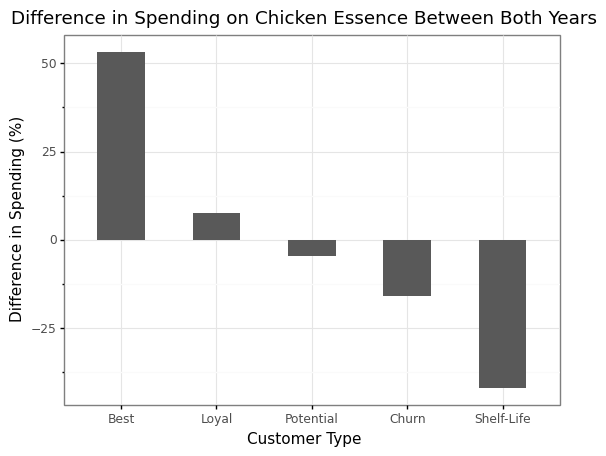

<ggplot: (-9223363286570397159)>

In [104]:
ggplot(chickenEssence) + geom_col(mapping = aes(x='Customer Type', y='spend_diff_%'), width=0.5) + labs(title = "Difference in Spending on Chicken Essence Between Both Years" , y = "Difference in Spending (%)") + theme_bw()


From our analysis (which is too lengthy to show here), Chicken Essence is a product which many customers buy once or twice and never buy it again, as they usually buy it for special occasions, or are experimenting in their purchases to ascertain whether Chicken Essence is a product worth spending on.

In the above graph, we observe that there was an increase of Spending in Chicken Essence from the 1st to 2nd Year from customers belonging to the `Best` and `Loyal` Customer Types, but a decrease in the others. 

This might be proof that although `Best` and `Loyal` customers are willing to trust the company enough to part with their money on an expensive product with a small quantity, but `Churn`, `Shelf-Life` and `Potential` customers perhaps were not willing enough to part with their money, in fear that it could be a "regret buy". Therefore, we would need to promote Chicken Essence more aggressively, and along the way, if a few customers like the product, they would spend more on the client and visit more frequently.

The promotions to introduce and raise more awareness about Chicken Essence to the other customer types can be customised to fit the categories. For customers in the Potential category, seeing as they are customers who are recent and had an increase in frequency or their expenditure, measures to bring their frequency and monetary values to the highest tiers should be implemented.

For instance, 1-for-1 sales or discounts can be put in place on Chicken Essence to entice them to visit and purchase even more frequently. On the other hand, customers in the Shelf-Life category are customers who, despite spending a lot of money on the client, visit less frequently or recently as compared to others. As such, Chicken Essence can be given as complimentary items to raise more awareness about it. Additional analysis on the effectiveness of providing Chicken Essence in retention packages for customers in the Churn category should also be done. 



#### Actionable Insight 3: Reducing Inventory of Universally Disliked Products

By observing the bottom few products of each `Customer Category` (by total spend), we would know which products are the least popular as a whole. These products should hence be lowered in supply since there is a consistently low demand across the board, for profit maximisation.

We look at the bottom 5 products for each Customer Type (aside from normal customers).

In [105]:
universalDislike = loyal_transactions[['Category', 'Spend']].groupby('Category').sum().reset_index().sort_values(by = 'Spend', ascending = False).tail()
universalDislike['Best'] = list(best_transactions[['Category', 'Spend']].groupby('Category').sum().reset_index().sort_values(by = 'Spend', ascending = False)['Category'].tail())
universalDislike['Churn'] = list(churn_transactions[['Category', 'Spend']].groupby('Category').sum().reset_index().sort_values(by = 'Spend', ascending = False)['Category'].tail())
universalDislike['Potential'] = list(potential_transactions[['Category', 'Spend']].groupby('Category').sum().reset_index().sort_values(by = 'Spend', ascending = False)['Category'].tail())
universalDislike['Shelf-Life'] = list(shelfLife_transactions[['Category', 'Spend']].groupby('Category').sum().reset_index().sort_values(by = 'Spend', ascending = False)['Category'].tail())
universalDislike.drop(columns=['Spend'], inplace=True)
universalDislike.rename(columns = {'Category': 'Loyal'})

universalDislike.reset_index(drop='index')

,Category,Best,Churn,Potential,Shelf-Life
0,RTD Coffee,Baby Cereal,Belacan,Ghee,Savoury Spread
1,Belacan,RTD Coffee,Energy Drinks,Spirits,Belacan
2,Baby Cereal,Belacan,Creamer,RTD Coffee,Jam
3,Creamer,Energy Drinks,Spirits,Belacan,Creamer
4,Energy Drinks,Creamer,Wine,Creamer,Energy Drinks


For instance, Energy Drinks appear in 4 of the 5 Customer Types as the bottom 5 products purchased throughout the 2 years. Such products which have universally low sales across all Customer Types would mean that these products are in low demand, therefore the client should consider lowering the inventory for it. 

<a id='end'></a>

## Conclusion

In summary, through the analysis of the datasets using RFM, it was observed that the product popularity remained largely similar across different customer categories. In particular, Best, Loyal, Potential and Shelf-Life Customers were the most similar while Churn customers had some distinguishable differences. Consequently, it would be more accurate to utilise solutions which are more customised to the different customer types, like RFM.

This report aimed to derive useful insights about customer purchasing behaviour and devise corresponding strategies to increase customer retention and maximise profit. Measures include reducing the expenditure of the company on products which are less popular, providing discounts on products which are the most popular and more. 
